In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
emotion_df = pd.read_csv('text.csv')

In [ ]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
violence_df = pd.read_csv('Train.csv')

In [ ]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [ ]:
hate_df = pd.read_csv('labeled_data.csv')

In [ ]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
emotion_df.drop(columns=['Unnamed: 0'], inplace=True)
violence_df.drop(columns=['Tweet_ID'], inplace=True)
hate_df = hate_df[['tweet', 'class']]

In [ ]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [ ]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [ ]:
#renaming the column
violence_df.rename(columns = {'tweet' : 'text', 'type' : 'label'}, inplace = True)
hate_df.rename(columns = {'tweet' : 'text', 'class' : 'label'}, inplace = True)

In [ ]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [ ]:
#checking for null values
emotion_df.isna().sum(), violence_df.isna().sum(), hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [ ]:
emotion_df.shape, violence_df.shape, hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

In [ ]:
emotion_df['label'].value_counts()

,count
label,
1,141067
0,121187
3,57317
4,47712
2,34554
5,14972


In [ ]:
e_df = pd.DataFrame()
for i in range(6):
  subset = emotion_df[emotion_df['label'] == i].sample(n = 2000, random_state = 42)
  e_df = pd.concat([e_df, subset])

In [ ]:
e_df.shape

(12000, 2)

In [ ]:
emotion_df = e_df.copy()

In [ ]:
emotion_df['label'].value_counts()

,count
label,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000


In [ ]:
violence_df['label'].value_counts()

,count
label,
sexual_violence,32648
Physical_violence,5946
emotional_violence,651
economic_violence,217
Harmful_Traditional_practice,188


In [ ]:
sexual_violence = violence_df[violence_df['label'] == 'sexual_violence'].sample(n = 4998, random_state = 42)
violence_df = violence_df[violence_df['label'] != 'sexual_violence']


In [ ]:
violence_df.shape

(7002, 2)

In [ ]:
violence_df=pd.concat([sexual_violence, violence_df],axis=0)

In [ ]:
violence_df.shape

(12000, 2)

In [ ]:
hate_df['label'].value_counts()

,count
label,
1,19190
2,4163
0,1430


In [ ]:
offensive_speech = hate_df[hate_df['label'] == 1].sample(n = 6407, random_state = 42)
hate_df = hate_df[hate_df['label'] != 1]

In [ ]:
hate_df.shape

(5593, 2)

In [ ]:
hate_df = pd.concat([offensive_speech, hate_df], axis=0)

In [ ]:
hate_df.shape

(12000, 2)

In [ ]:
emotion_df.shape, violence_df.shape, hate_df.shape

((12000, 2), (12000, 2), (12000, 2))

In [ ]:
emotion_df.head(3)

,text,label
133243,ive learned to surround myself with women who ...,0
88501,i already feel crappy because of this and you ...,0
131379,i feel like i have lost mourned and moved past...,0


In [ ]:
violence_df.head(3)

,text,label
35209,My cousin was raped by this guy Matthew. She w...,sexual_violence
38191,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence
20925,I remember how I almost got raped like it was ...,sexual_violence


In [ ]:
hate_df.head(3)

,text,label
22889,Why is it everytime I go to cracker barrel the...,1
20565,"Run that nigga, you don't want that nigga, but...",1
10780,I need a girl from Jamaica I can't fuck with t...,1


In [ ]:
emotion_df.reset_index(drop = True, inplace = True)
violence_df.reset_index(drop = True, inplace = True)
hate_df.reset_index(drop = True, inplace = True)

In [ ]:
emotion_df.head(3)

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0


In [ ]:
violence_df.head(3)

,text,label
0,My cousin was raped by this guy Matthew. She w...,sexual_violence
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence
2,I remember how I almost got raped like it was ...,sexual_violence


In [ ]:
hate_df.head(3)

,text,label
0,Why is it everytime I go to cracker barrel the...,1
1,"Run that nigga, you don't want that nigga, but...",1
2,I need a girl from Jamaica I can't fuck with t...,1


In [ ]:
label_encoder = LabelEncoder()
violence_df['label'] = label_encoder.fit_transform(violence_df['label'])

In [ ]:
violence_df.head()

,text,label
0,My cousin was raped by this guy Matthew. She w...,4
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,4
2,I remember how I almost got raped like it was ...,4
3,He raped me 👈,4
4,"A woman raped by A male: psychological horror,...",4


In [ ]:
violence_df['label'].unique()

array([4, 1, 3, 0, 2])

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
len(stop_words)

198

In [ ]:
#stopwords removal function

def remove_stopwords(text):
  all_words = nltk.word_tokenize(text)
  filtered_words = [word for word in all_words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violence_df['text'] = violence_df['text'].apply(remove_stopwords)
hate_df['text'] = hate_df['text'].apply(remove_stopwords)

In [ ]:
emotion_df.head(3)

,text,label
0,ive learned surround women lift leave feeling ...,0
1,already feel crappy upset situation doesnt help,0
2,feel like lost mourned moved past tears relati...,0


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violence_df['text'], hate_df['text']]))

In [ ]:
emotion_sequences = tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequences = tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_df['text'])

In [ ]:
emotion_df['text'].iloc[2]

'feel like lost mourned moved past tears relationship'

In [ ]:
emotion_sequences[2:3]

[[1, 5, 321, 11854, 1207, 422, 1093, 385]]

In [ ]:
max_length = 50
emotion_padded = pad_sequences(emotion_sequences, maxlen = max_length, padding = 'post')
violence_padded = pad_sequences(violence_sequences, maxlen = max_length, padding = 'post')
hate_padded = pad_sequences(hate_sequences, maxlen = max_length, padding = 'post')

In [ ]:
emotion_padded[2:3]

array([[    1,     5,   321, 11854,  1207,   422,  1093,   385,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [ ]:
#generating labels in numpy array format
emotion_labels = np.array(emotion_df['label'])
violence_labels = np.array(violence_df['label'])
hate_labels = np.array(hate_df['label'])

In [ ]:
#prepare seperate inputs for each dataset
emotion_input = emotion_padded
violence_input = violence_padded
hate_input = hate_padded

In [ ]:
#defining multiple input layers for each task
emotion_input_layer = keras.layers.Input(shape = (max_length,), name = 'emotion_input')
violence_input_layer = keras.layers.Input(shape = (max_length,), name = 'violence_input')
hate_input_layer = keras.layers.Input(shape = (max_length,), name = 'hate_input')

In [ ]:
#use as Shared embedding layer
embedding_layer = keras.layers.Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 128)

In [ ]:
#APPLY THE EMBEDDING LAYER TO EACH INPUT
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [ ]:
#shared LSTM layer
shared_lstm = keras.layers.LSTM(64, return_sequences = True)

In [ ]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [ ]:
#shared global average pooling layer and dropout layer
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [ ]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [ ]:
len(emotion_df['label'].unique()), len(violence_df['label'].unique()), len(hate_df['label'].unique())

(6, 5, 3)

In [ ]:
#output layers
emotion_output = keras.layers.Dense(6, activation = 'softmax', name = 'emotion_output')(emotion_features)
violence_output = keras.layers.Dense(5, activation = 'softmax', name = 'violence_output')(violence_features)
hate_output = keras.layers.Dense(3, activation = 'softmax', name = 'hate_output')(hate_features)

In [ ]:
#compile the model with multiple inputs and outputs
model = keras.models.Model(inputs = [emotion_input_layer, violence_input_layer, hate_input_layer],
                           outputs = [emotion_output, violence_output, hate_output])

model.compile(optimizer = 'adam',
              loss = {
                  'emotion_output' : 'sparse_categorical_crossentropy',
                  'violence_output' :'sparse_categorical_crossentropy',
                  'hate_output' : 'sparse_categorical_crossentropy'
              },
              metrics = {
                  'emotion_output': 'accuracy',
                  'violence_output': 'accuracy',
                  'hate_output':'accuracy'
              })

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  5,350,528 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0],  │
│                     │                   │            │ embedding[2][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[1][0],       │
│                     │                   │            │ lstm[2][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ dropout[1][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout[2][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,400,846 (20.60 MB)

 Trainable params: 5,400,846 (20.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model with sepearte inputs
model.fit(x = {'emotion_input' : emotion_input,
               'violence_input' : violence_input,
               'hate_input' : hate_input},
          y = {'emotion_output' : emotion_labels,
               'violence_output' : violence_labels,
               'hate_output' : hate_labels},
          epochs = 10,
          batch_size = 4)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 330s 110ms/step - emotion_output_accuracy: 0.4530 - emotion_output_loss: 1.3506 - hate_output_accuracy: 0.8483 - hate_output_loss: 0.4553 - loss: 1.8953 - violence_output_accuracy: 0.9713 - violence_output_loss: 0.0894
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 379s 109ms/step - emotion_output_accuracy: 0.9145 - emotion_output_loss: 0.3105 - hate_output_accuracy: 0.9131 - hate_output_loss: 0.2561 - loss: 0.5865 - violence_output_accuracy: 0.9953 - violence_output_loss: 0.0199
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 380s 108ms/step - emotion_output_accuracy: 0.9559 - emotion_output_loss: 0.1434 - hate_output_accuracy: 0.9614 - hate_output_loss: 0.1207 - loss: 0.2702 - violence_output_accuracy: 0.9988 - violence_output_loss: 0.0062
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 380s 108ms/step - emotion_output_accuracy: 0.9689 - emotion_output_loss: 0.0948 - hate_output_accuracy: 0.9821 - hate_output_loss: 0.0598 - loss: 0.1596 - violence_output_accu

In [ ]:
prediction = model.predict({'emotion_input' : emotion_input,
                            'violence_input' : violence_input,
                            'hate_input' : hate_input})

375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step


In [ ]:
prediction

[array([[9.9999458e-01, 8.8577440e-07, 2.4095684e-07, 1.8562706e-06,
         2.2455865e-06, 1.0632208e-07],
        [9.9999815e-01, 1.3242068e-07, 4.5507626e-08, 1.4853364e-06,
         1.7927336e-07, 3.0486191e-08],
        [9.9999672e-01, 2.1902369e-07, 2.7801150e-07, 2.2539591e-06,
         3.6809087e-07, 1.0659012e-07],
        ...,
        [1.3728145e-05, 5.7945723e-05, 1.6733014e-06, 4.2114198e-06,
         4.0622606e-04, 9.9951619e-01],
        [1.0335636e-06, 1.1595605e-06, 1.0526906e-07, 2.9720264e-08,
         5.7210386e-06, 9.9999183e-01],
        [5.0876290e-05, 3.9055958e-05, 3.6248034e-06, 1.4638885e-06,
         7.9066711e-05, 9.9982595e-01]], dtype=float32),
 array([[1.01497882e-07, 6.24785770e-08, 1.07732525e-08, 2.24058994e-08,
         9.99999702e-01],
        [4.02333988e-08, 4.05678264e-08, 1.24635573e-08, 7.49778373e-09,
         9.99999821e-01],
        [1.24551505e-07, 4.65564121e-08, 2.65238072e-08, 4.87620000e-10,
         9.99999702e-01],
        ...,
      

In [ ]:
emotion_pred = np.argmax(prediction[0], axis = 1)
violence_pred = np.argmax(prediction[1], axis = 1)
hate_pred = np.argmax(prediction[2], axis = 1)

In [ ]:
violence_df['label'].unique()

array([4, 1, 3, 0, 2])

In [ ]:
def plot_cm(true, pred, title, labels):
  cf = confusion_matrix(true, pred, normalize = 'true')
  plt.figure(figsize = (7, 6))
  sns.heatmap(cf, annot = True, cmap = 'Blues', xticklabels=labels, yticklabels = labels)
  plt.title(title)
  plt.ylabel('Actual')
  plt.xlabel('Prediction')

emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_practice', 'economic violence']
hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

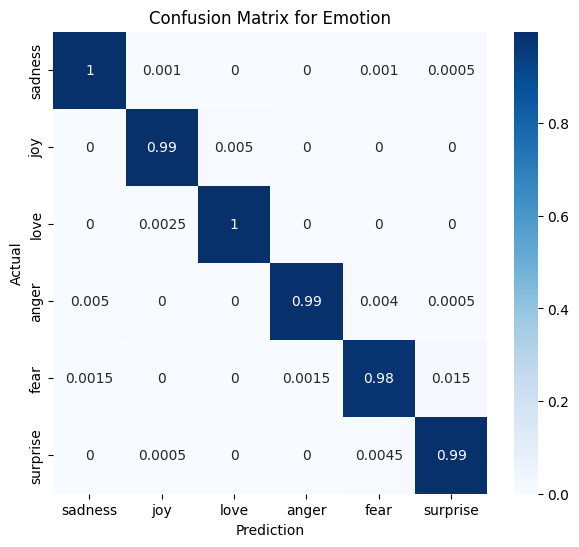

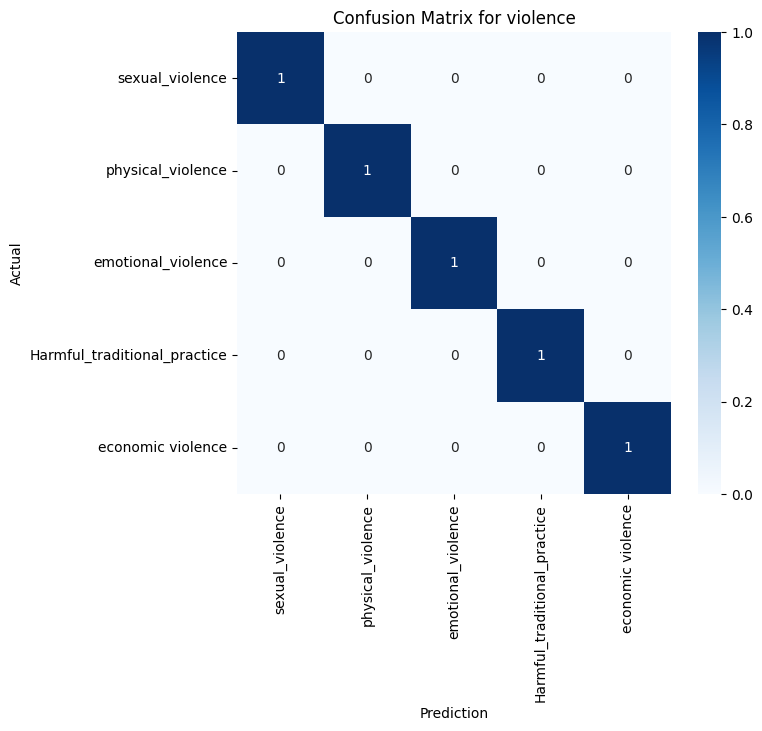

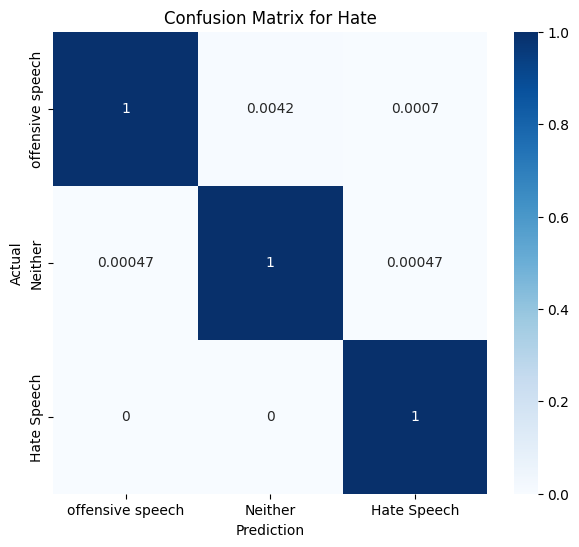

In [ ]:
plot_cm(emotion_labels, emotion_pred, 'Confusion Matrix for Emotion', emotion_labels_text)
plot_cm(violence_labels, violence_pred, 'Confusion Matrix for violence', violence_labels_text)
plot_cm(hate_labels, hate_pred, 'Confusion Matrix for Hate', hate_labels_text)

In [ ]:
def classify_text(input_text):
  #preprocess the input text
  input_text_cleaned = remove_stopwords(input_text)
  input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
  input_padded = pad_sequences(input_sequence, maxlen = max_length, padding = 'post')

  #prediction
  predictions = model.predict({'emotion_input' : input_padded,
                            'violence_input' : input_padded,
                            'hate_input' : input_padded})
  emotion_pred = np.argmax(predictions[0], axis = 1)[0]
  violence_pred = np.argmax(predictions[1], axis = 1)[0]
  hate_pred = np.argmax(predictions[2], axis = 1)[0]

  #determine major label
  major_labels = ['Emotion', 'Violence', 'Hate']
  major_label_index = np.argmax([np.max(predictions[0]), np.max(predictions[1]), np.max(predictions[2])])
  major_label = major_labels[major_label_index]

  #determing sub - labels
  emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
  violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_practice', 'economic violence']
  hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

  if major_label == 'Emotion':
    sub_label = emotion_labels_text[emotion_pred]
  elif major_label == 'Violence':
    sub_label = violence_labels_text[violence_pred]
  else:
    sub_label = hate_labels_text[hate_pred]

  return major_label, sub_label

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
#define a text widget and a placeholder
input_text_widget = widgets.Text(
    description = 'Input text : ',
    placeholder = 'Enter you text'
)

In [ ]:
#define classify button
button = widgets.Button(description = 'classify')

In [ ]:
#define an output area to display result
output = widgets.Output()

Textarea(value='', description='Input Text:', placeholder='Type your text here...')

Button(description='Classify Text', style=ButtonStyle())

Output()

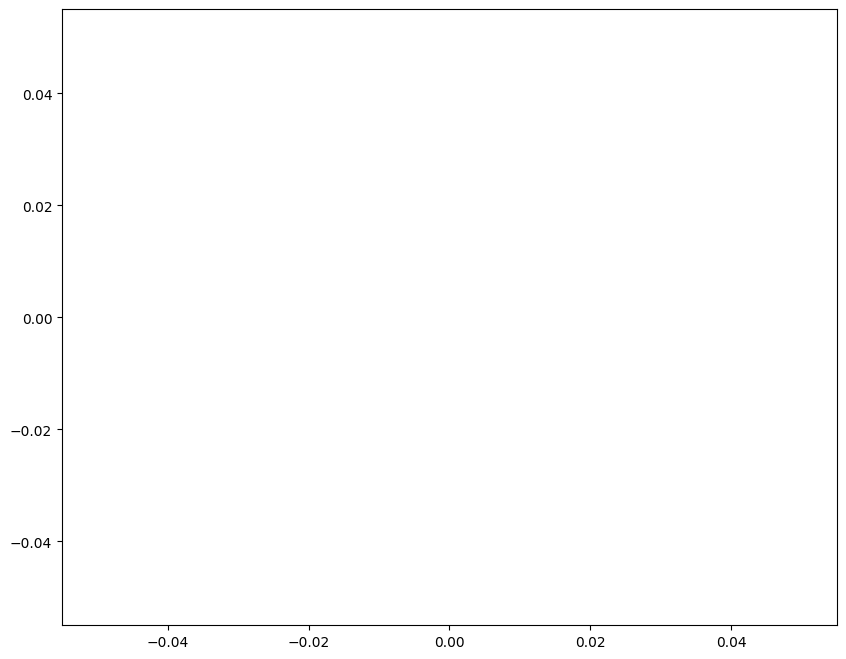

In [ ]:
#function to handle event
def on_button_click(b):
  with output:
    output.clear_output()   #clear the previous output
    input_text = input_text_widget.value
    major_label, sub_label = classify_text(input_text)
    print(f'Major Label : {major_label}')
    print(f'Sub Label : {sub_label}')

#attach the button at bottom
button.on_click(on_button_click)

In [ ]:
display(input_text_widget, button, output)

Text(value='', description='Input text : ', placeholder='Enter you text')

Button(description='classify', style=ButtonStyle())

Output()

Emotion Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      2000
     Class 1       1.00      0.99      1.00      2000
     Class 2       1.00      1.00      1.00      2000
     Class 3       1.00      0.99      0.99      2000
     Class 4       0.99      0.98      0.99      2000
     Class 5       0.98      0.99      0.99      2000

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



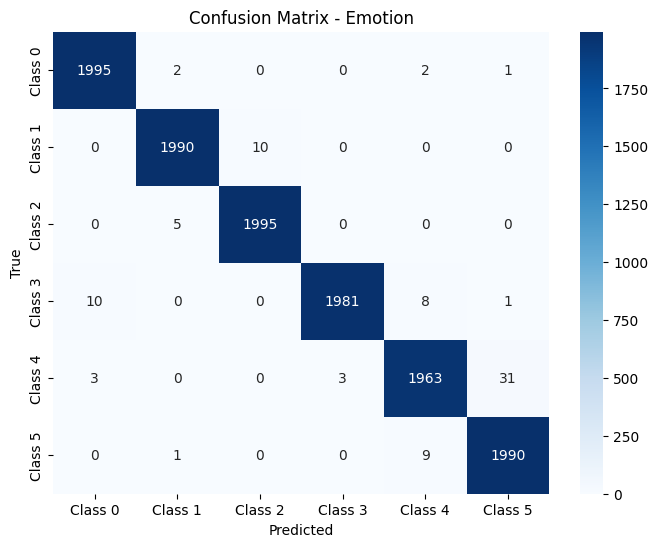

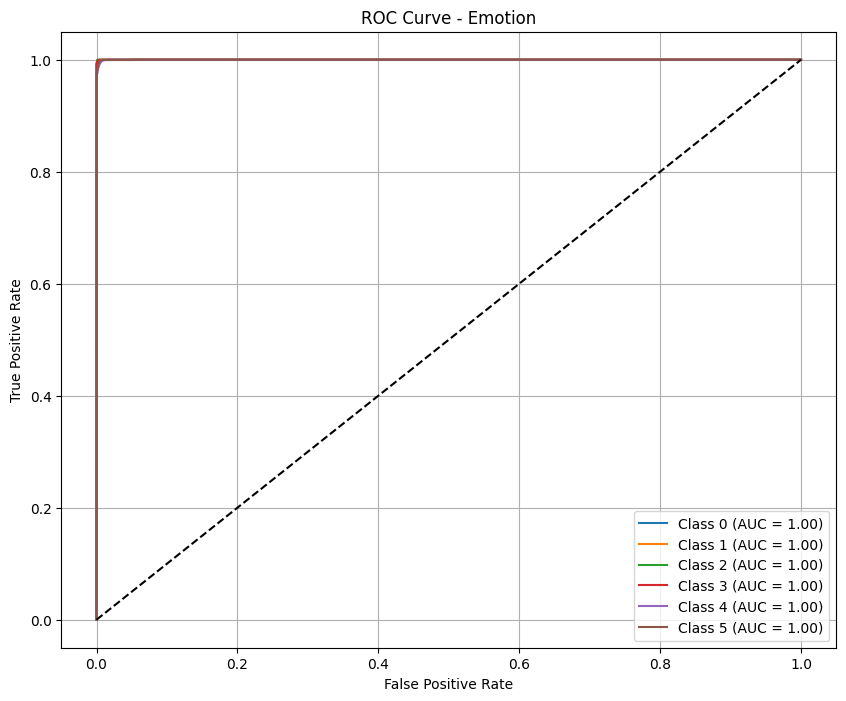

Emotion Class-wise ROC-AUC Scores:
Class 0: 1.0000
Class 1: 1.0000
Class 2: 1.0000
Class 3: 1.0000
Class 4: 0.9999
Class 5: 0.9999

Violence Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       188
     Class 1       1.00      1.00      1.00      5946
     Class 2       1.00      1.00      1.00       217
     Class 3       1.00      1.00      1.00       651
     Class 4       1.00      1.00      1.00      4998

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



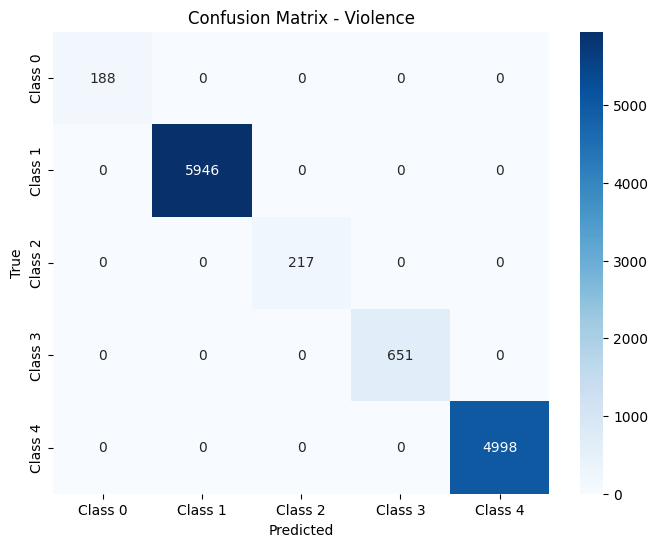

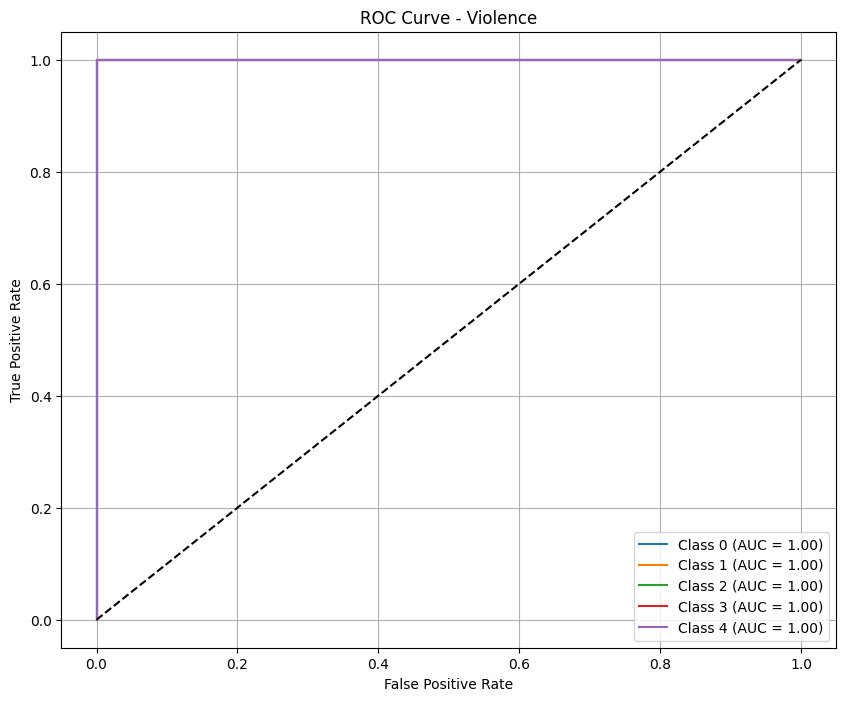

Violence Class-wise ROC-AUC Scores:
Class 0: 1.0000
Class 1: 1.0000
Class 2: 1.0000
Class 3: 1.0000
Class 4: 1.0000

Hate Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1430
     Class 1       1.00      1.00      1.00      6407
     Class 2       1.00      1.00      1.00      4163

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



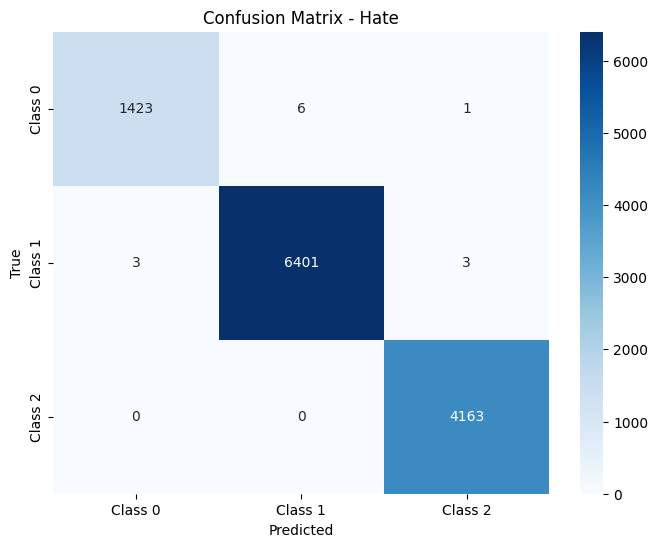

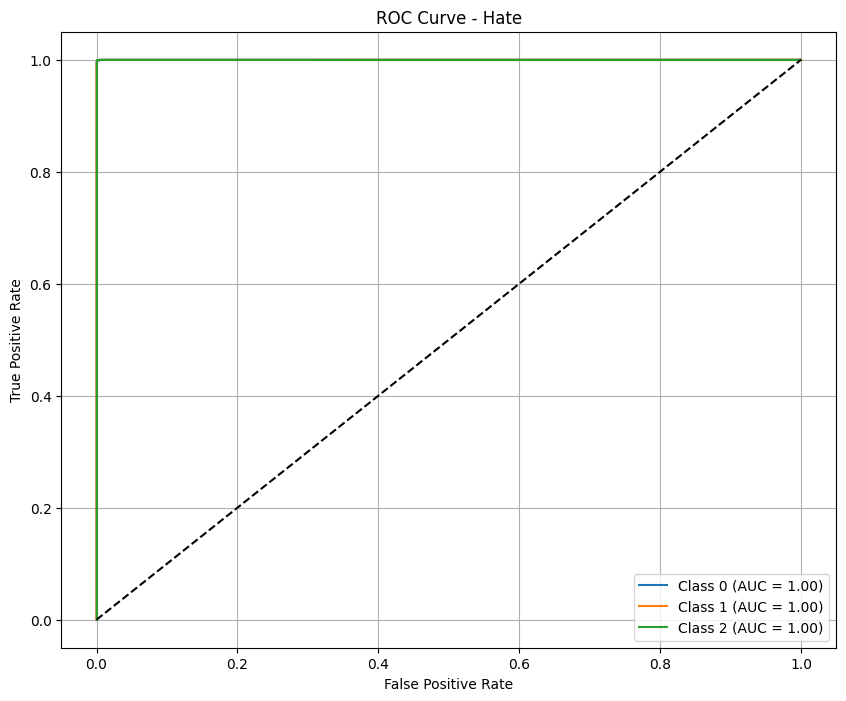

Hate Class-wise ROC-AUC Scores:
Class 0: 1.0000
Class 1: 1.0000
Class 2: 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot ROC Curve and show AUC per class
def plot_roc_curve(y_true, y_probs, labels, title):
    y_true_bin = label_binarize(y_true, classes=range(len(labels)))

    plt.figure(figsize=(10, 8))
    aucs = {}
    for i in range(len(labels)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        aucs[labels[i]] = roc_auc
        plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return aucs

# Helper function to fix label names automatically
def fix_labels(y_true, labels_text):
    n_classes = len(np.unique(y_true))
    if len(labels_text) != n_classes:
        labels_text = [f'Class {i}' for i in range(n_classes)]
    return labels_text

# Example labels text (update these if you have real names)
emotion_labels_text = ['Happy', 'Sad', 'Angry', 'Neutral']  # Example
violence_labels_text = ['Violent', 'Non-Violent']
hate_labels_text = ['Hate Speech', 'Not Hate Speech']

# ---- Emotion ----
emotion_labels_text = fix_labels(emotion_labels, emotion_labels_text)
emotion_report = classification_report(emotion_labels, emotion_pred, target_names=emotion_labels_text)
print("Emotion Classification Report:\n", emotion_report)
plot_confusion_matrix(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
emotion_aucs = plot_roc_curve(emotion_labels, prediction[0], emotion_labels_text, 'Emotion')

print("Emotion Class-wise ROC-AUC Scores:")
for label, auc_value in emotion_aucs.items():
    print(f'{label}: {auc_value:.4f}')

# ---- Violence ----
violence_labels_text = fix_labels(violence_labels, violence_labels_text)
violence_report = classification_report(violence_labels, violence_pred, target_names=violence_labels_text)
print("\nViolence Classification Report:\n", violence_report)
plot_confusion_matrix(violence_labels, violence_pred, violence_labels_text, 'Violence')
violence_aucs = plot_roc_curve(violence_labels, prediction[1], violence_labels_text, 'Violence')

print("Violence Class-wise ROC-AUC Scores:")
for label, auc_value in violence_aucs.items():
    print(f'{label}: {auc_value:.4f}')

# ---- Hate ----
hate_labels_text = fix_labels(hate_labels, hate_labels_text)
hate_report = classification_report(hate_labels, hate_pred, target_names=hate_labels_text)
print("\nHate Classification Report:\n", hate_report)
plot_confusion_matrix(hate_labels, hate_pred, hate_labels_text, 'Hate')
hate_aucs = plot_roc_curve(hate_labels, prediction[2], hate_labels_text, 'Hate')

print("Hate Class-wise ROC-AUC Scores:")
for label, auc_value in hate_aucs.items():
    print(f'{label}: {auc_value:.4f}')


Emotion Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      2000
     Class 1       1.00      0.99      1.00      2000
     Class 2       1.00      1.00      1.00      2000
     Class 3       1.00      0.99      0.99      2000
     Class 4       0.99      0.98      0.99      2000
     Class 5       0.98      0.99      0.99      2000

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



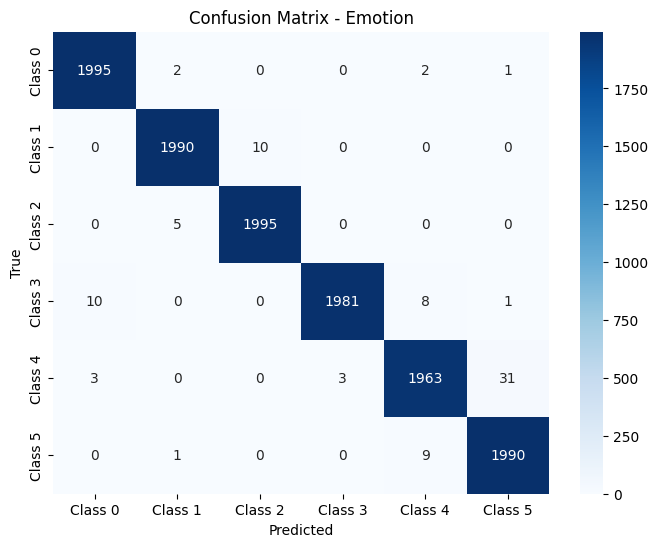

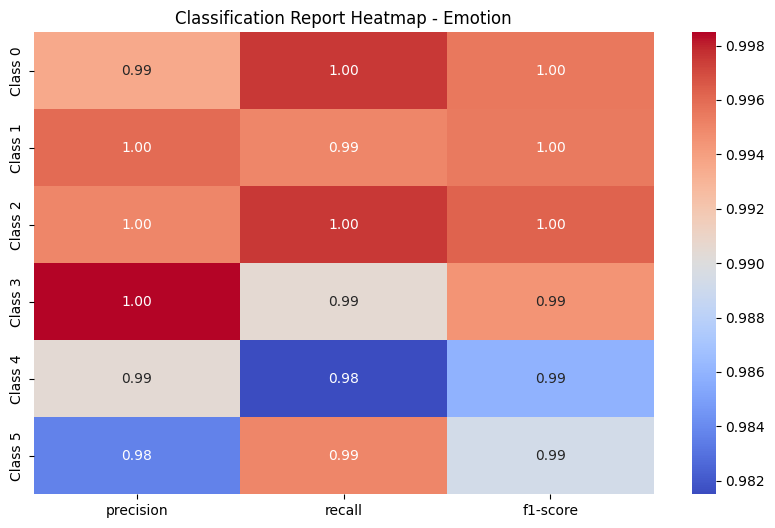

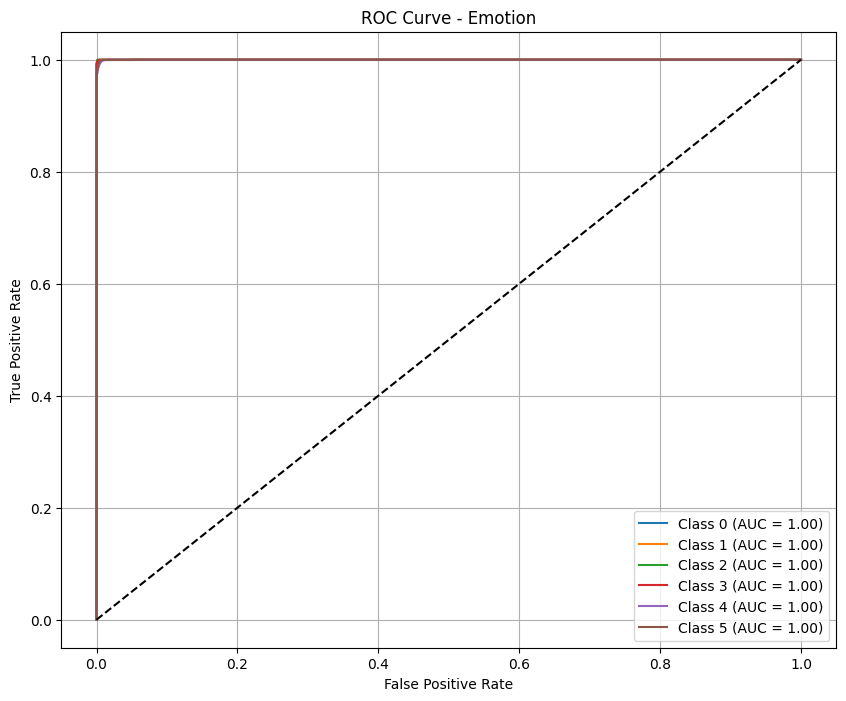

Emotion ROC-AUC: 1.0000

Violence Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       188
     Class 1       1.00      1.00      1.00      5946
     Class 2       1.00      1.00      1.00       217
     Class 3       1.00      1.00      1.00       651
     Class 4       1.00      1.00      1.00      4998

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



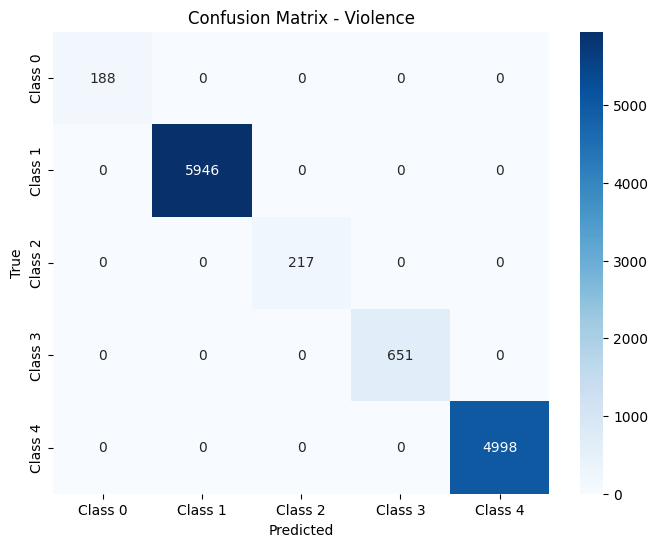

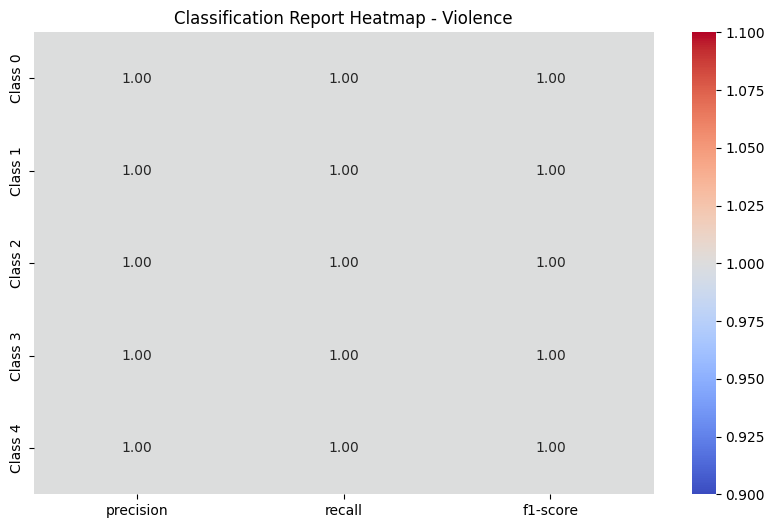

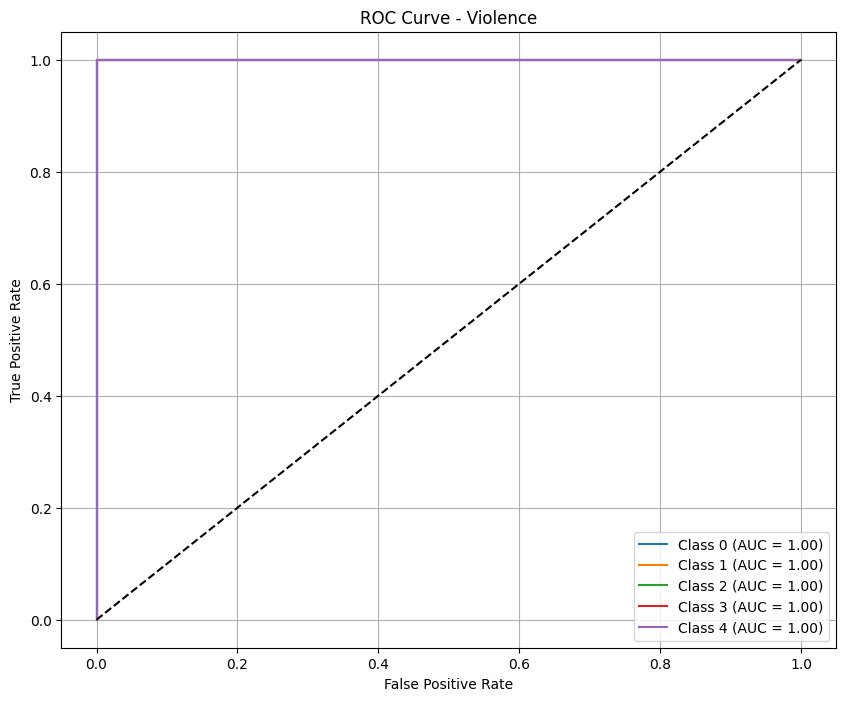

Violence ROC-AUC: 1.0000

Hate Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1430
     Class 1       1.00      1.00      1.00      6407
     Class 2       1.00      1.00      1.00      4163

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



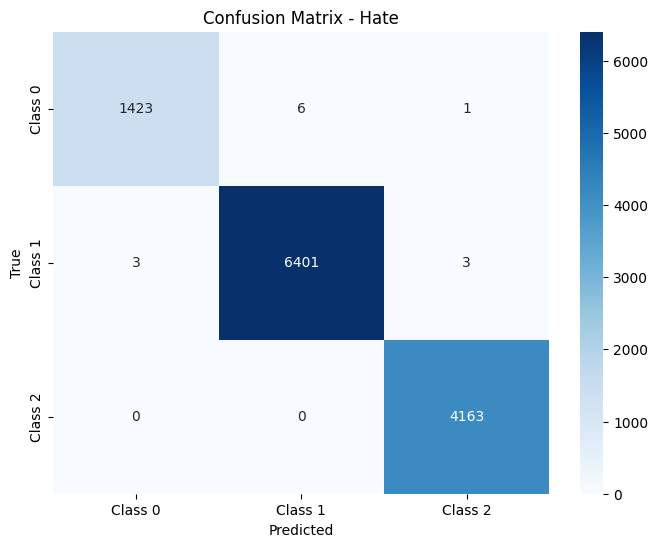

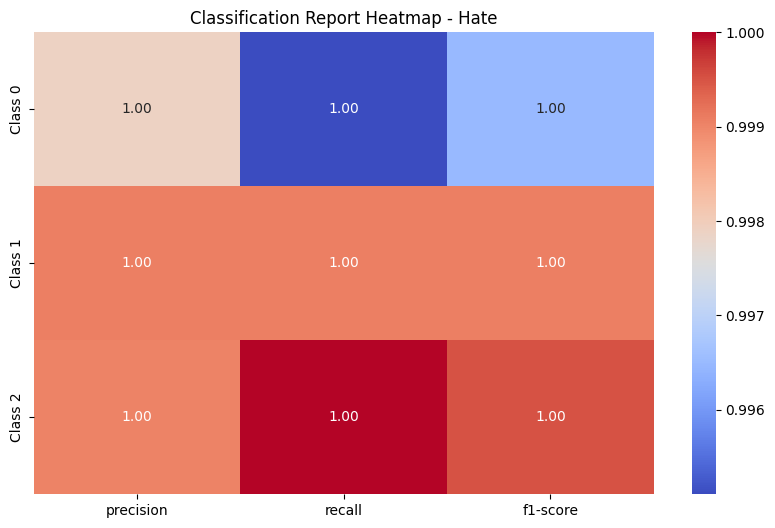

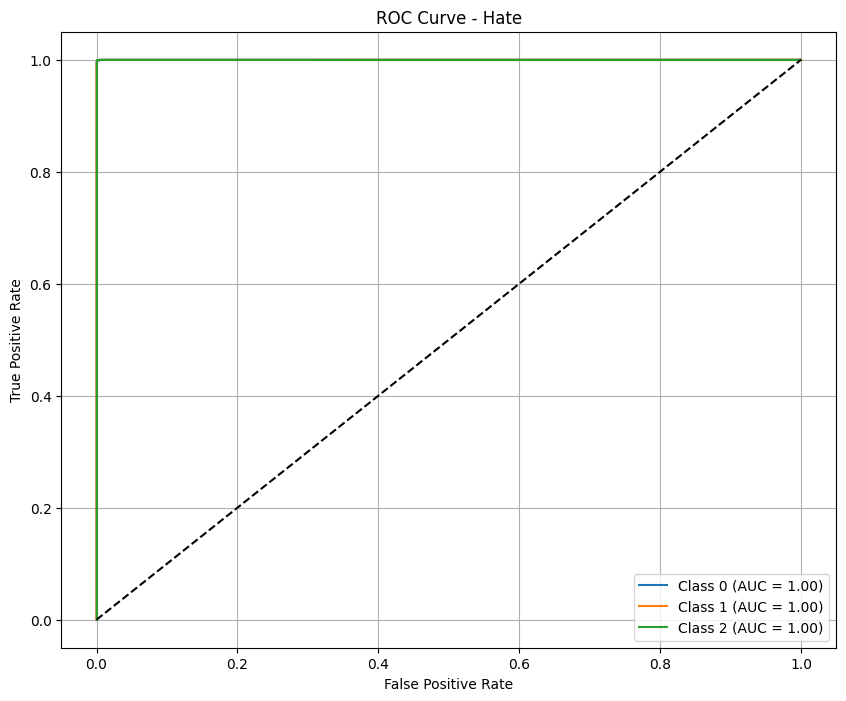

Hate ROC-AUC: 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# ---- Helper Functions ----

# Plot Confusion Matrix Heatmap
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot Classification Report Heatmap
def plot_classification_report_heatmap(y_true, y_pred, labels, title):
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.iloc[:-3, :3]  # Remove 'accuracy', 'macro avg', 'weighted avg'

    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Classification Report Heatmap - {title}')
    plt.show()

# Plot ROC Curve
def plot_roc_curve(y_true, y_probs, labels, title):
    y_true_bin = label_binarize(y_true, classes=range(len(labels)))

    plt.figure(figsize=(10, 8))
    for i in range(len(labels)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Auto-fix label names if mismatch
def fix_labels(y_true, labels_text):
    n_classes = len(np.unique(y_true))
    if len(labels_text) != n_classes:
        labels_text = [f'Class {i}' for i in range(n_classes)]
    return labels_text

# ---- Labels Texts (edit these as needed) ----

emotion_labels_text = ['Happy', 'Sad', 'Angry', 'Neutral']  # Example for emotion
violence_labels_text = ['Violent', 'Non-Violent']            # Example for violence
hate_labels_text = ['Hate Speech', 'Not Hate Speech']        # Example for hate

# ---- Emotion ----

emotion_labels_text = fix_labels(emotion_labels, emotion_labels_text)
emotion_report = classification_report(emotion_labels, emotion_pred, target_names=emotion_labels_text)
print("Emotion Classification Report:\n", emotion_report)

plot_confusion_matrix(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_classification_report_heatmap(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_roc_curve(emotion_labels, prediction[0], emotion_labels_text, 'Emotion')

emotion_roc_auc = roc_auc_score(emotion_labels, prediction[0], multi_class='ovr')
print(f'Emotion ROC-AUC: {emotion_roc_auc:.4f}')

# ---- Violence ----

violence_labels_text = fix_labels(violence_labels, violence_labels_text)
violence_report = classification_report(violence_labels, violence_pred, target_names=violence_labels_text)
print("\nViolence Classification Report:\n", violence_report)

plot_confusion_matrix(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_classification_report_heatmap(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_roc_curve(violence_labels, prediction[1], violence_labels_text, 'Violence')

violence_roc_auc = roc_auc_score(violence_labels, prediction[1], multi_class='ovr')
print(f'Violence ROC-AUC: {violence_roc_auc:.4f}')

# ---- Hate ----

hate_labels_text = fix_labels(hate_labels, hate_labels_text)
hate_report = classification_report(hate_labels, hate_pred, target_names=hate_labels_text)
print("\nHate Classification Report:\n", hate_report)

plot_confusion_matrix(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_classification_report_heatmap(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_roc_curve(hate_labels, prediction[2], hate_labels_text, 'Hate')

hate_roc_auc = roc_auc_score(hate_labels, prediction[2], multi_class='ovr')
print(f'Hate ROC-AUC: {hate_roc_auc:.4f}')


Emotion Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      2000
     Class 1       1.00      0.99      1.00      2000
     Class 2       1.00      1.00      1.00      2000
     Class 3       1.00      0.99      0.99      2000
     Class 4       0.99      0.98      0.99      2000
     Class 5       0.98      0.99      0.99      2000

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



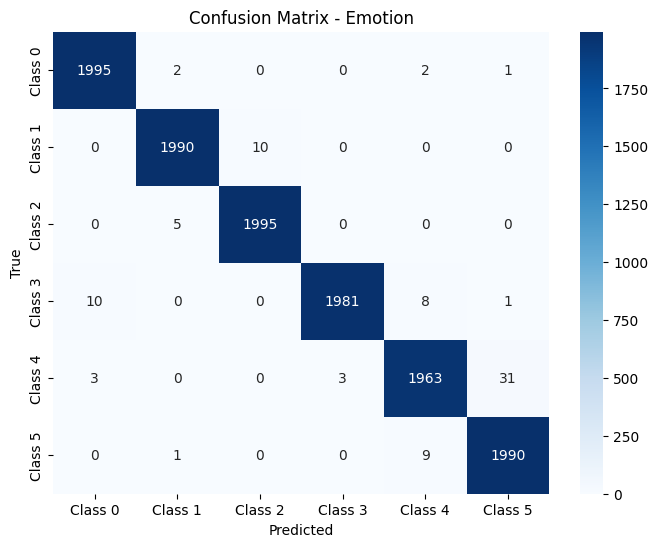

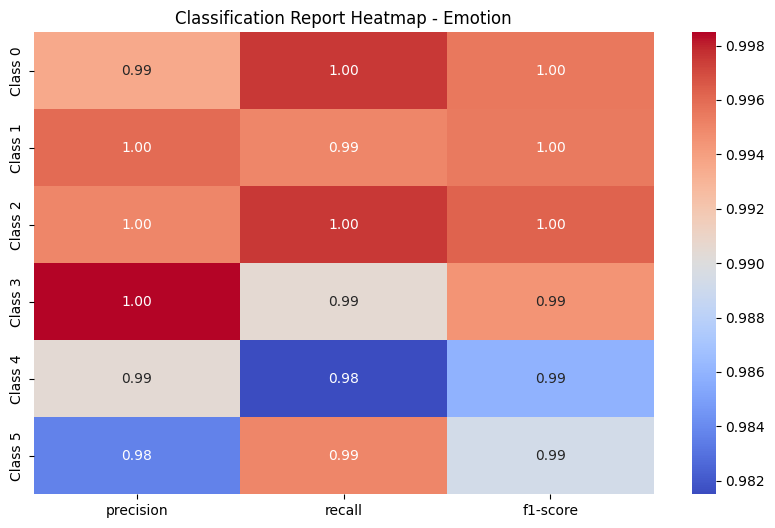

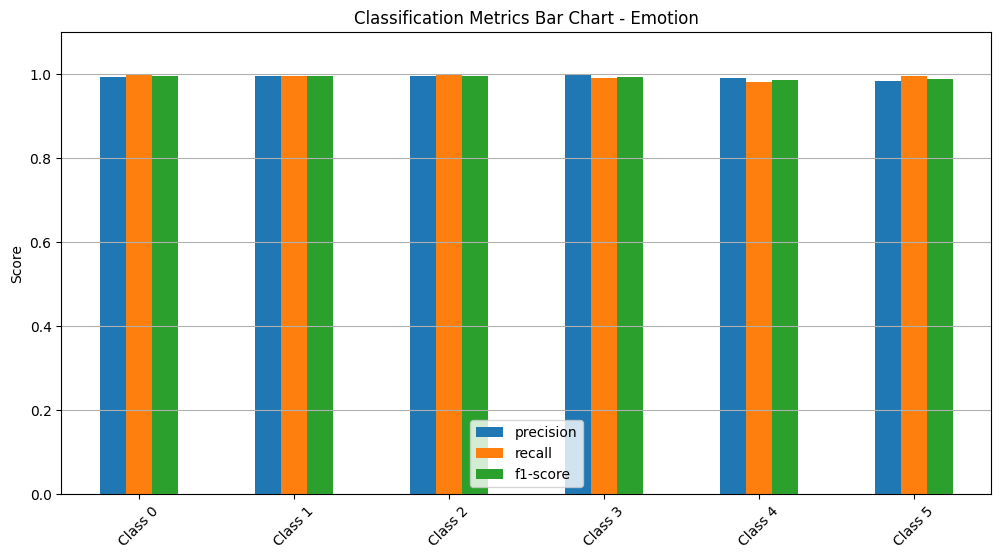

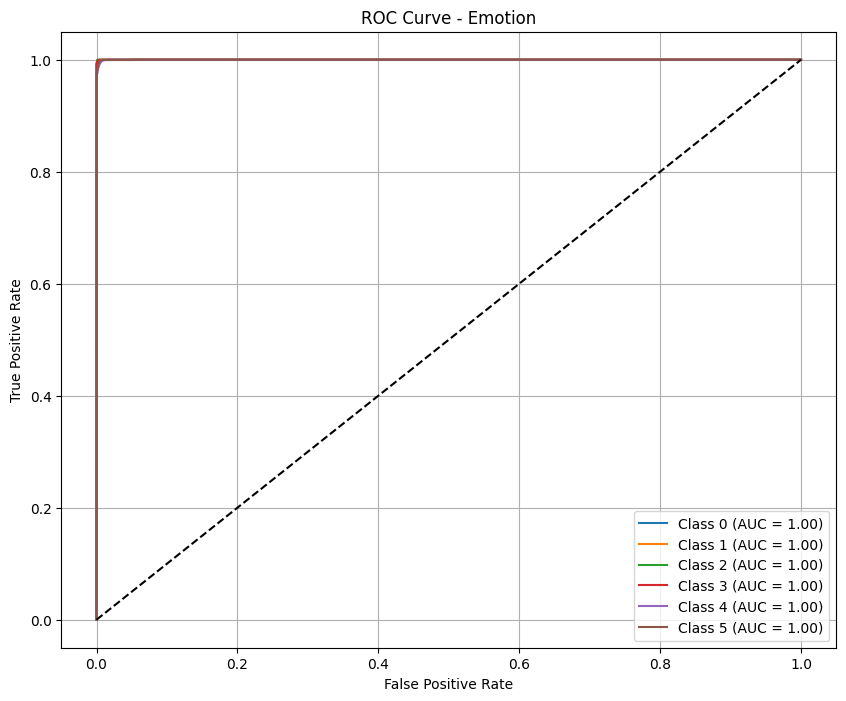

Emotion ROC-AUC: 1.0000

Violence Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       188
     Class 1       1.00      1.00      1.00      5946
     Class 2       1.00      1.00      1.00       217
     Class 3       1.00      1.00      1.00       651
     Class 4       1.00      1.00      1.00      4998

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



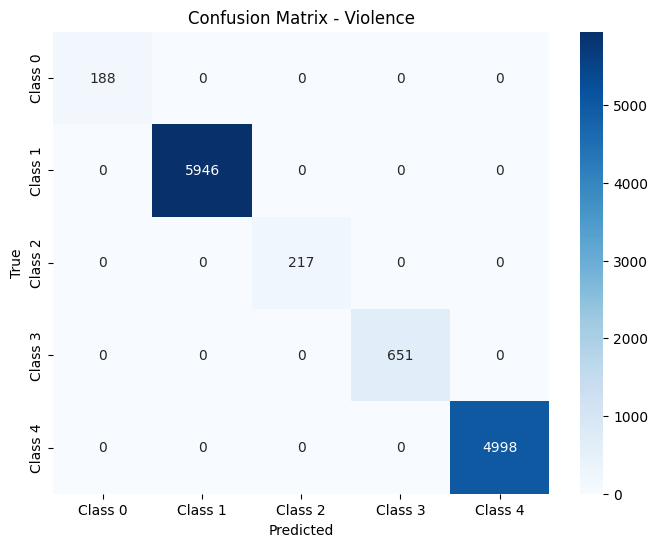

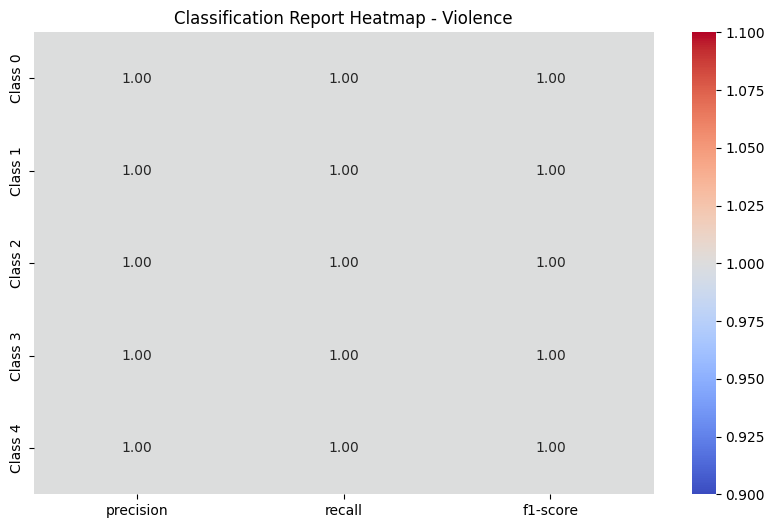

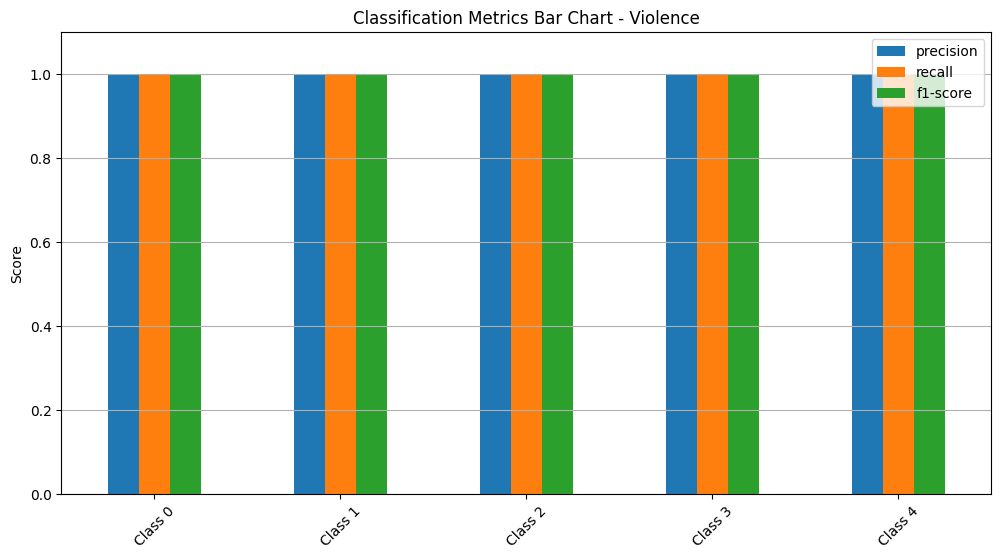

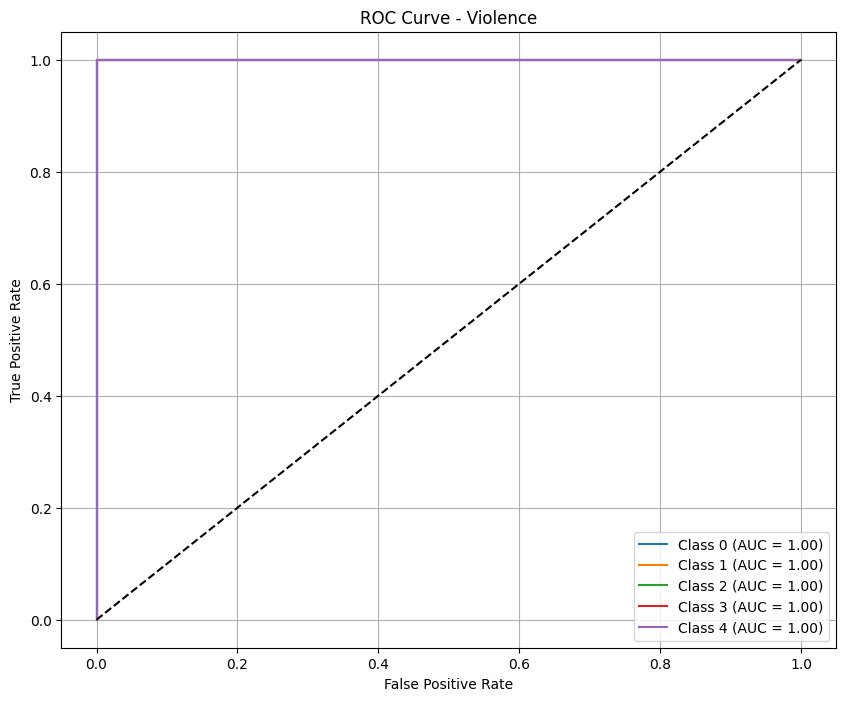

Violence ROC-AUC: 1.0000

Hate Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1430
     Class 1       1.00      1.00      1.00      6407
     Class 2       1.00      1.00      1.00      4163

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



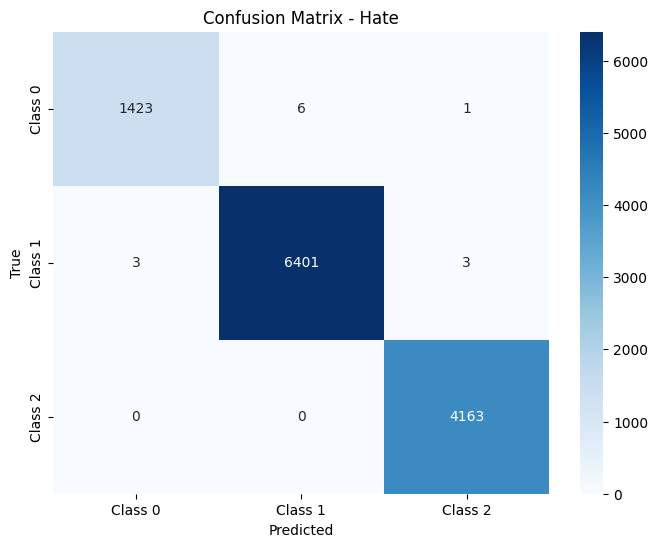

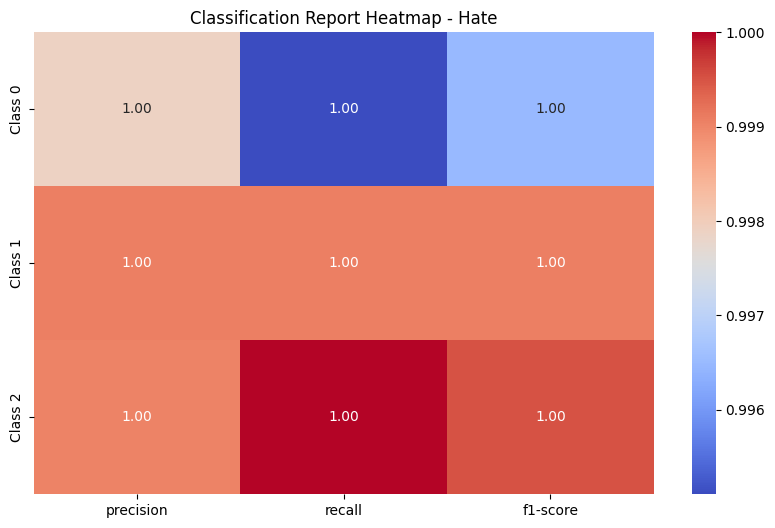

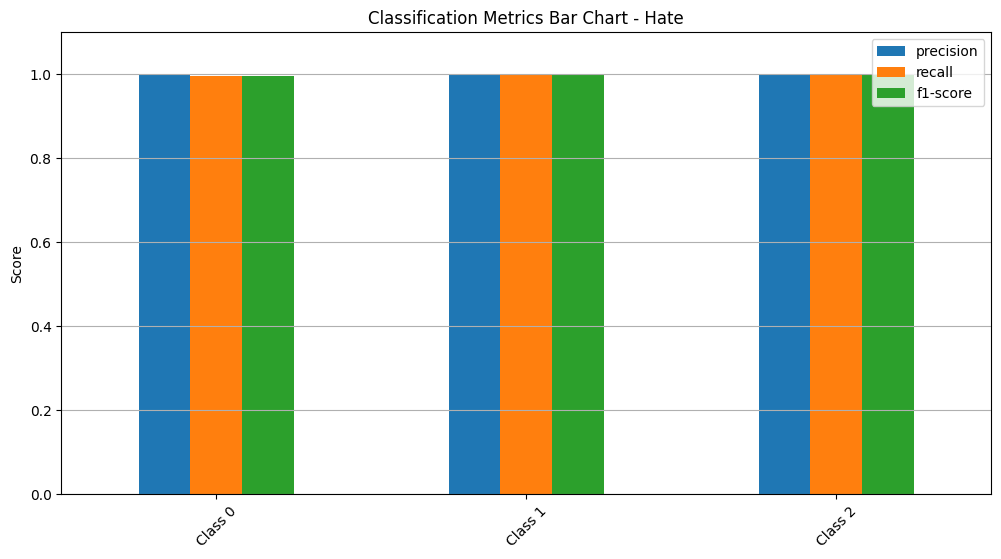

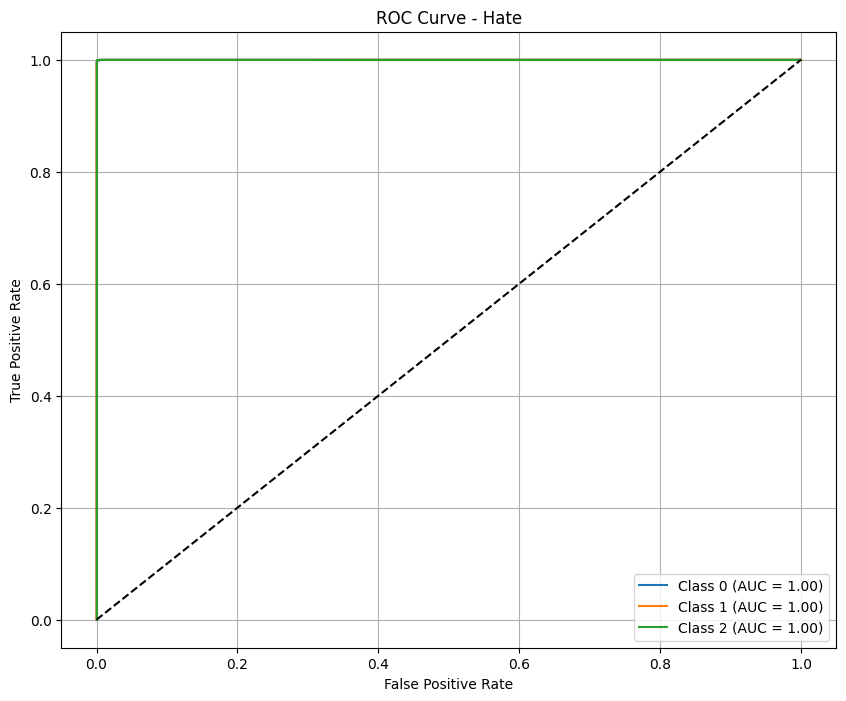

Hate ROC-AUC: 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# ---- Helper Functions ----

# Plot Confusion Matrix Heatmap
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot Classification Report Heatmap
def plot_classification_report_heatmap(y_true, y_pred, labels, title):
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.iloc[:-3, :3]  # Remove 'accuracy', 'macro avg', 'weighted avg'

    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Classification Report Heatmap - {title}')
    plt.show()

# Plot ROC Curve
def plot_roc_curve(y_true, y_probs, labels, title):
    y_true_bin = label_binarize(y_true, classes=range(len(labels)))

    plt.figure(figsize=(10, 8))
    for i in range(len(labels)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot Bar Chart for Classification Report
def plot_classification_bar(y_true, y_pred, labels, title):
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.iloc[:-3, :3]  # Remove 'accuracy', 'macro avg', 'weighted avg'

    df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
    plt.title(f'Classification Metrics Bar Chart - {title}')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

# Auto-fix label names if mismatch
def fix_labels(y_true, labels_text):
    n_classes = len(np.unique(y_true))
    if len(labels_text) != n_classes:
        labels_text = [f'Class {i}' for i in range(n_classes)]
    return labels_text

# ---- Labels Texts (edit if needed) ----

emotion_labels_text = ['Happy', 'Sad', 'Angry', 'Neutral']
violence_labels_text = ['Violent', 'Non-Violent']
hate_labels_text = ['Hate Speech', 'Not Hate Speech']

# ---- Emotion ----

emotion_labels_text = fix_labels(emotion_labels, emotion_labels_text)
emotion_report = classification_report(emotion_labels, emotion_pred, target_names=emotion_labels_text)
print("Emotion Classification Report:\n", emotion_report)

plot_confusion_matrix(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_classification_report_heatmap(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_classification_bar(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_roc_curve(emotion_labels, prediction[0], emotion_labels_text, 'Emotion')

emotion_roc_auc = roc_auc_score(emotion_labels, prediction[0], multi_class='ovr')
print(f'Emotion ROC-AUC: {emotion_roc_auc:.4f}')

# ---- Violence ----

violence_labels_text = fix_labels(violence_labels, violence_labels_text)
violence_report = classification_report(violence_labels, violence_pred, target_names=violence_labels_text)
print("\nViolence Classification Report:\n", violence_report)

plot_confusion_matrix(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_classification_report_heatmap(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_classification_bar(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_roc_curve(violence_labels, prediction[1], violence_labels_text, 'Violence')

violence_roc_auc = roc_auc_score(violence_labels, prediction[1], multi_class='ovr')
print(f'Violence ROC-AUC: {violence_roc_auc:.4f}')

# ---- Hate ----

hate_labels_text = fix_labels(hate_labels, hate_labels_text)
hate_report = classification_report(hate_labels, hate_pred, target_names=hate_labels_text)
print("\nHate Classification Report:\n", hate_report)

plot_confusion_matrix(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_classification_report_heatmap(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_classification_bar(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_roc_curve(hate_labels, prediction[2], hate_labels_text, 'Hate')

hate_roc_auc = roc_auc_score(hate_labels, prediction[2], multi_class='ovr')
print(f'Hate ROC-AUC: {hate_roc_auc:.4f}')


Emotion Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      2000
     Class 1       1.00      0.99      1.00      2000
     Class 2       1.00      1.00      1.00      2000
     Class 3       1.00      0.99      0.99      2000
     Class 4       0.99      0.98      0.99      2000
     Class 5       0.98      0.99      0.99      2000

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



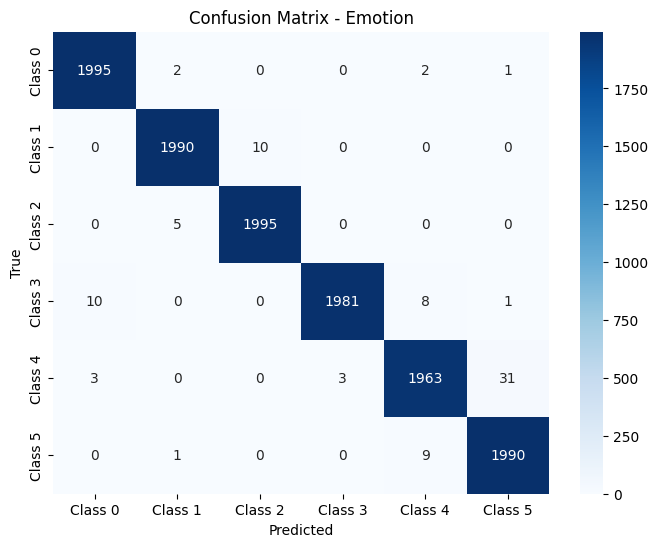

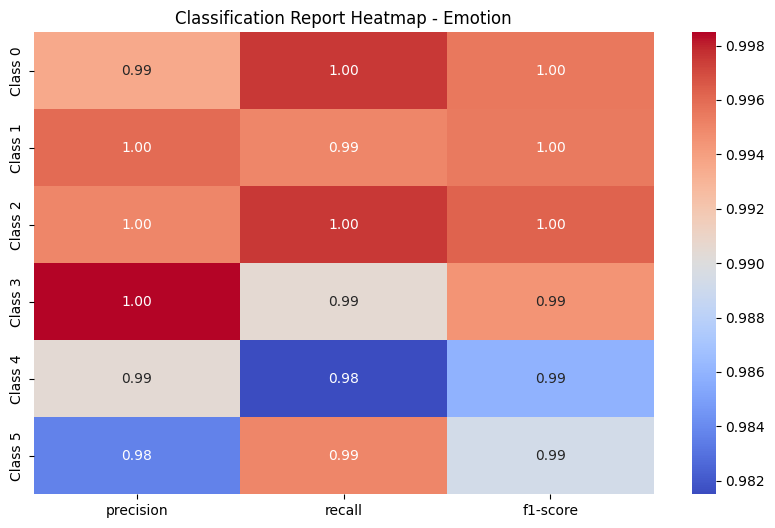

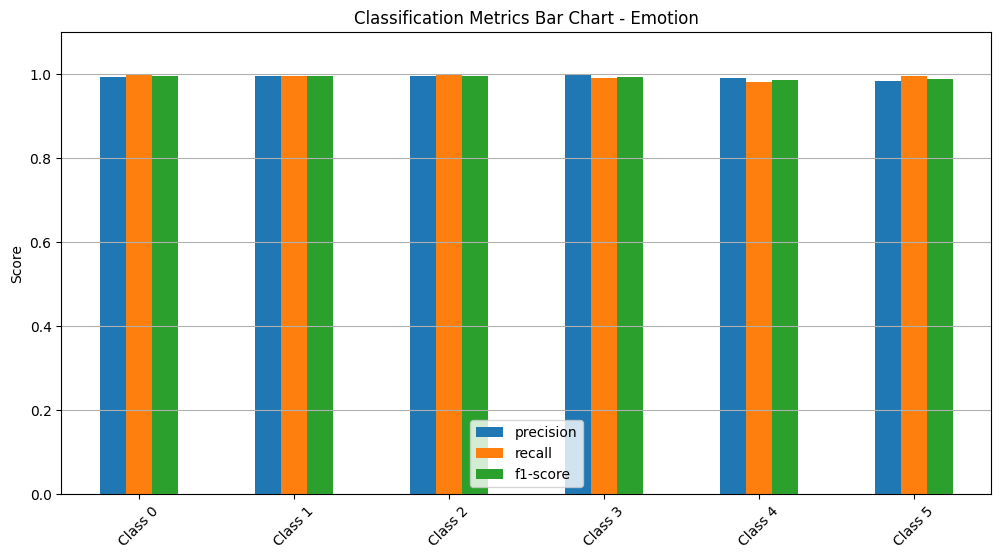

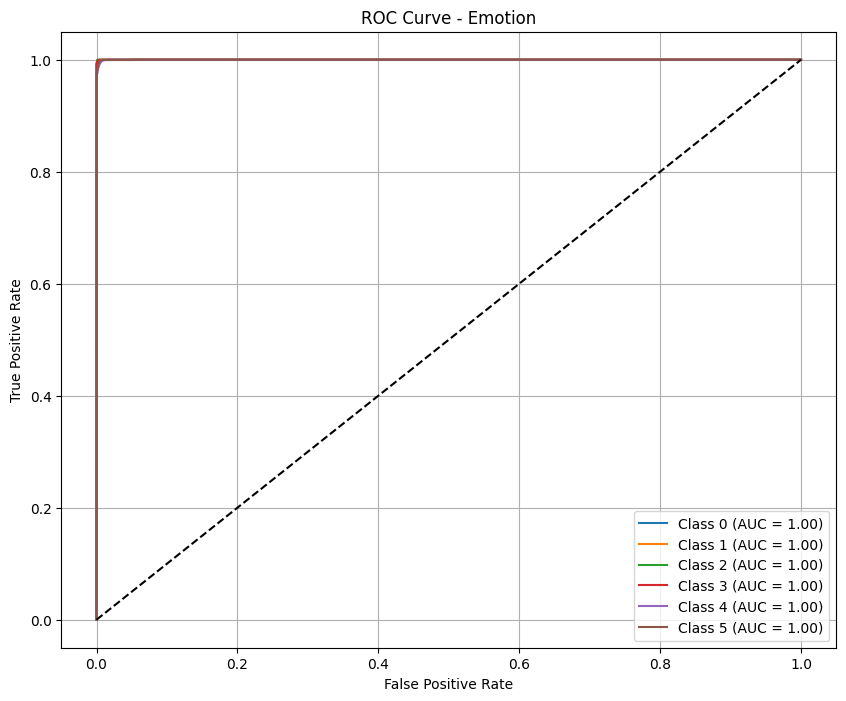

Emotion ROC-AUC: 1.0000

Violence Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       188
     Class 1       1.00      1.00      1.00      5946
     Class 2       1.00      1.00      1.00       217
     Class 3       1.00      1.00      1.00       651
     Class 4       1.00      1.00      1.00      4998

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



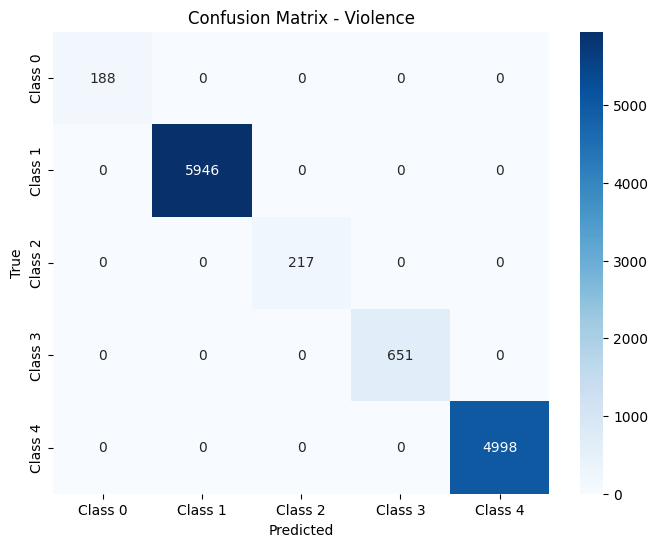

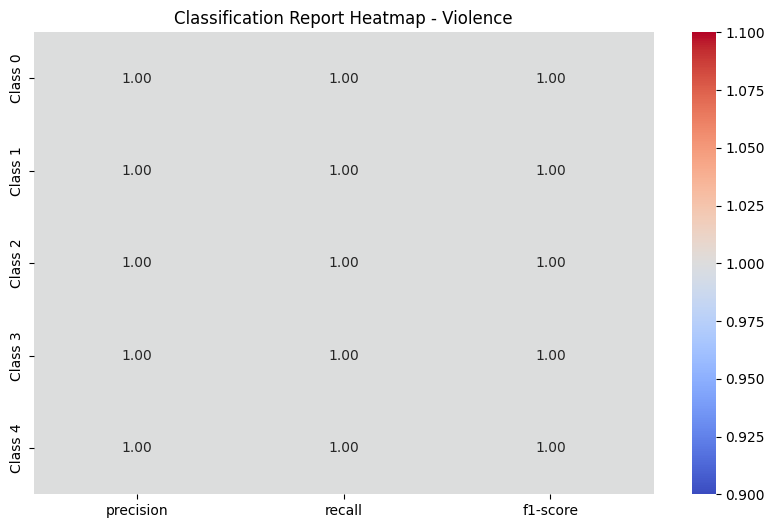

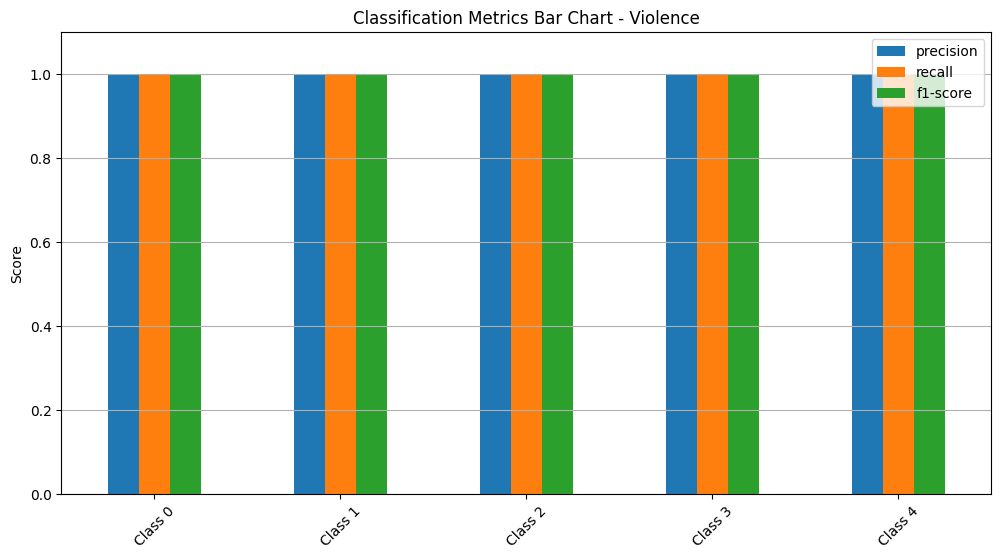

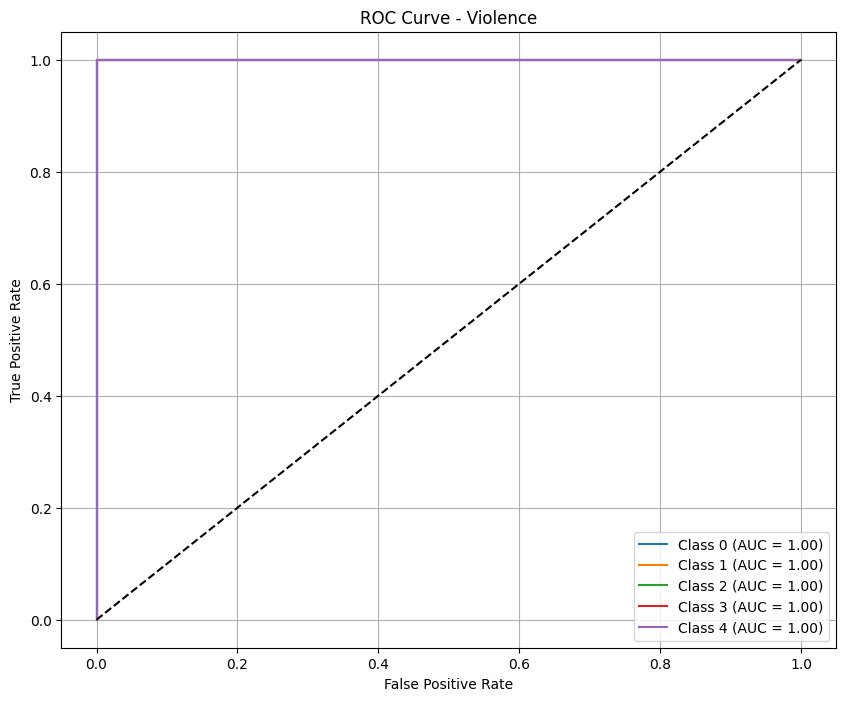

Violence ROC-AUC: 1.0000

Hate Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1430
     Class 1       1.00      1.00      1.00      6407
     Class 2       1.00      1.00      1.00      4163

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



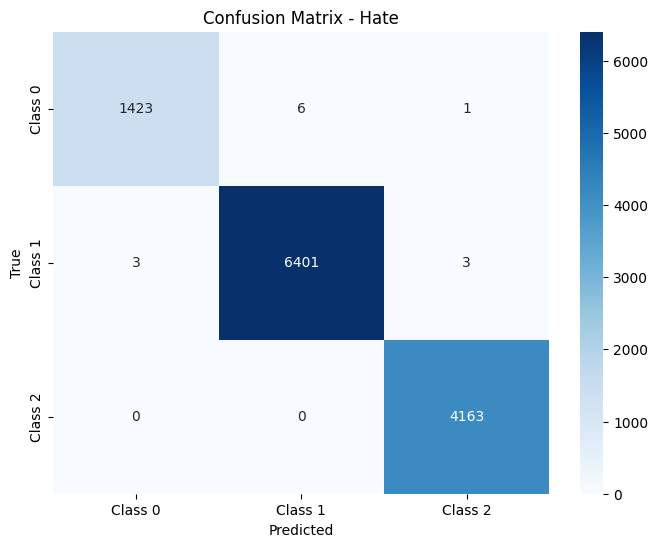

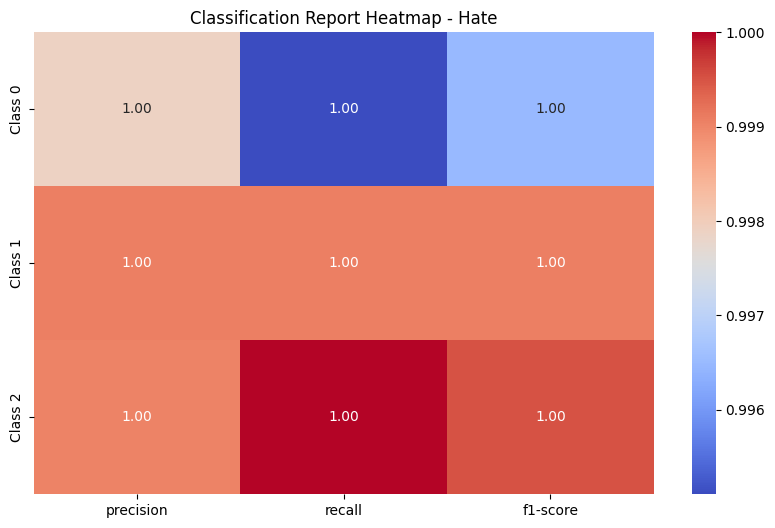

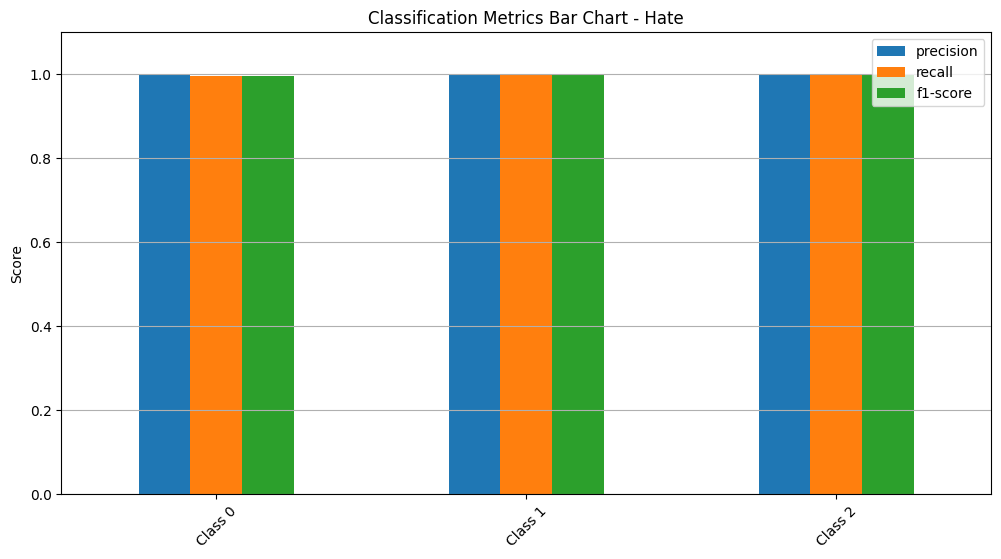

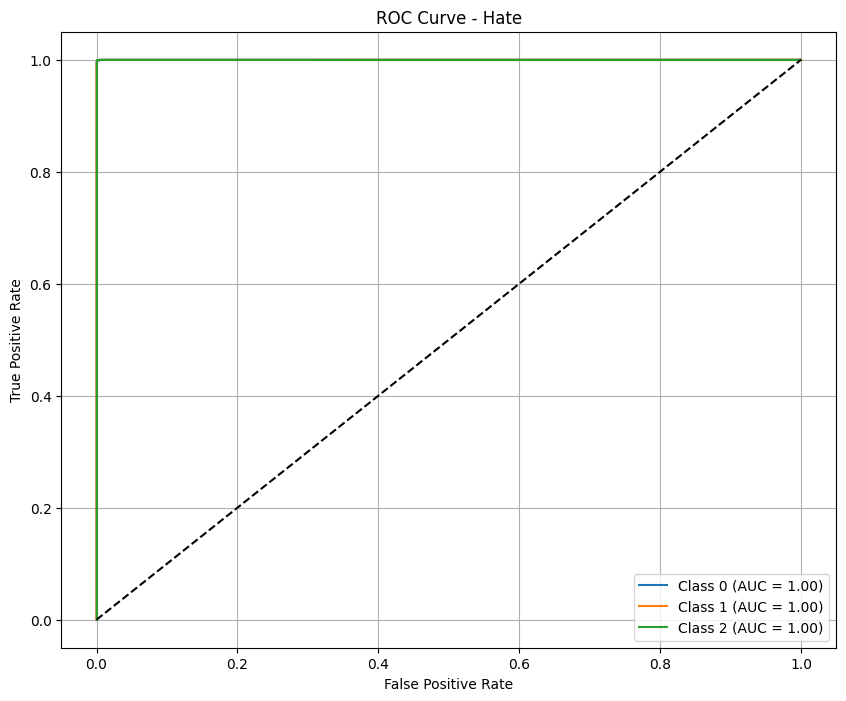

Hate ROC-AUC: 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# ---- Helper Functions ----

# Plot Confusion Matrix Heatmap
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot Classification Report Heatmap
def plot_classification_report_heatmap(y_true, y_pred, labels, title):
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.iloc[:-3, :3]  # Remove 'accuracy', 'macro avg', 'weighted avg'

    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Classification Report Heatmap - {title}')
    plt.show()

# Plot ROC Curve
def plot_roc_curve(y_true, y_probs, labels, title):
    y_true_bin = label_binarize(y_true, classes=range(len(labels)))

    plt.figure(figsize=(10, 8))
    for i in range(len(labels)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot Bar Chart for Classification Report
def plot_classification_bar(y_true, y_pred, labels, title):
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.iloc[:-3, :3]  # Remove 'accuracy', 'macro avg', 'weighted avg'

    df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
    plt.title(f'Classification Metrics Bar Chart - {title}')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

# Visualize model predictions - simple count
def plot_prediction_distribution(y_pred, labels, title):
    counts = pd.Series(y_pred).value_counts().sort_index()
    counts.index = labels

    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Prediction Distribution - {title}')
    plt.ylabel('Number of Predictions')
    plt.xlabel('Predicted Classes')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Compare True Labels vs Predicted Labels
def plot_true_vs_pred(y_true, y_pred, labels, title):
    true_counts = pd.Series(y_true).value_counts().sort_index()
    pred_counts = pd.Series(y_pred).value_counts().sort_index()

    df = pd.DataFrame({'True': true_counts, 'Predicted': pred_counts})
    df.index = labels

    df.plot(kind='bar', figsize=(10,6))
    plt.title(f'True vs Predicted Labels - {title}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# If you have probabilities (optional)
def plot_prediction_probabilities(y_probs, labels, title):
    avg_probs = np.mean(y_probs, axis=0)

    plt.figure(figsize=(10,6))
    sns.barplot(x=labels, y=avg_probs, palette='coolwarm')
    plt.title(f'Average Prediction Probabilities - {title}')
    plt.ylabel('Average Confidence')
    plt.ylim(0, 1.0)
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

# Auto-fix label names if mismatch
def fix_labels(y_true, labels_text):
    n_classes = len(np.unique(y_true))
    if len(labels_text) != n_classes:
        labels_text = [f'Class {i}' for i in range(n_classes)]
    return labels_text

# ---- Labels Texts (edit if needed) ----

emotion_labels_text = ['Happy', 'Sad', 'Angry', 'Neutral']
violence_labels_text = ['Violent', 'Non-Violent']
hate_labels_text = ['Hate Speech', 'Not Hate Speech']

# ---- Emotion ----
emotion_labels_text = fix_labels(emotion_labels, emotion_labels_text)
emotion_report = classification_report(emotion_labels, emotion_pred, target_names=emotion_labels_text)
print("Emotion Classification Report:\n", emotion_report)

plot_confusion_matrix(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_classification_report_heatmap(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_classification_bar(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_roc_curve(emotion_labels, prediction[0], emotion_labels_text, 'Emotion')

emotion_roc_auc = roc_auc_score(emotion_labels, prediction[0], multi_class='ovr')
print(f'Emotion ROC-AUC: {emotion_roc_auc:.4f}')

# ---- Violence ----
violence_labels_text = fix_labels(violence_labels, violence_labels_text)
violence_report = classification_report(violence_labels, violence_pred, target_names=violence_labels_text)
print("\nViolence Classification Report:\n", violence_report)

plot_confusion_matrix(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_classification_report_heatmap(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_classification_bar(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_roc_curve(violence_labels, prediction[1], violence_labels_text, 'Violence')

violence_roc_auc = roc_auc_score(violence_labels, prediction[1], multi_class='ovr')
print(f'Violence ROC-AUC: {violence_roc_auc:.4f}')

# ---- Hate ----
hate_labels_text = fix_labels(hate_labels, hate_labels_text)
hate_report = classification_report(hate_labels, hate_pred, target_names=hate_labels_text)
print("\nHate Classification Report:\n", hate_report)

plot_confusion_matrix(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_classification_report_heatmap(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_classification_bar(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_roc_curve(hate_labels, prediction[2], hate_labels_text, 'Hate')

hate_roc_auc = roc_auc_score(hate_labels, prediction[2], multi_class='ovr')
print(f'Hate ROC-AUC: {hate_roc_auc:.4f}')


Emotion Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      2000
     Class 1       1.00      0.99      1.00      2000
     Class 2       1.00      1.00      1.00      2000
     Class 3       1.00      0.99      0.99      2000
     Class 4       0.99      0.98      0.99      2000
     Class 5       0.98      0.99      0.99      2000

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



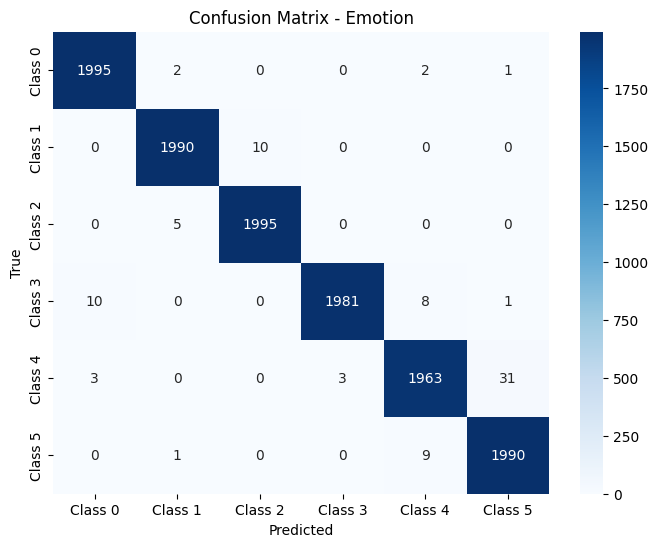

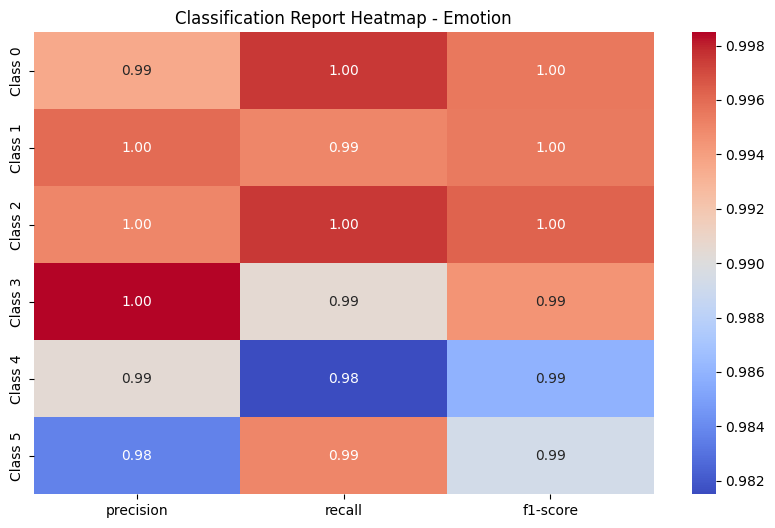

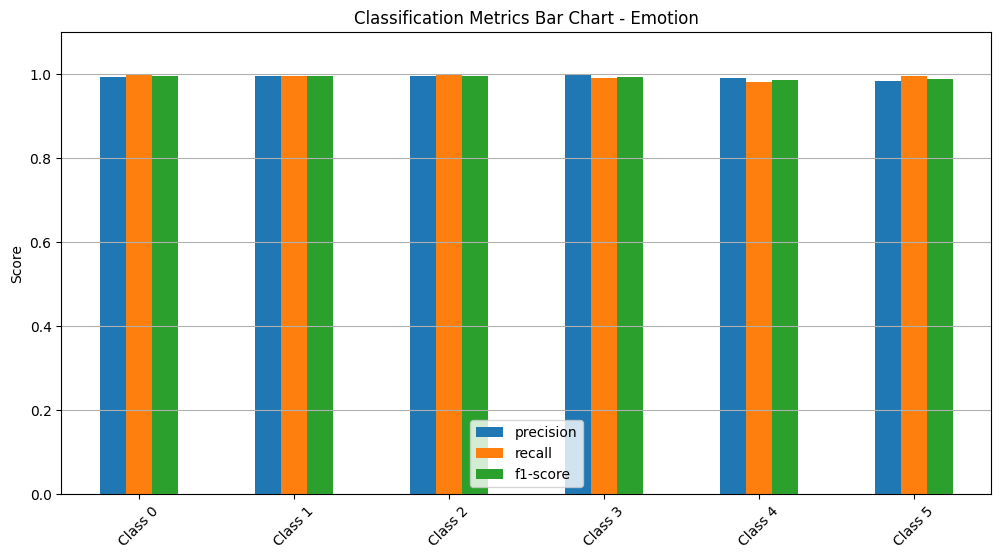

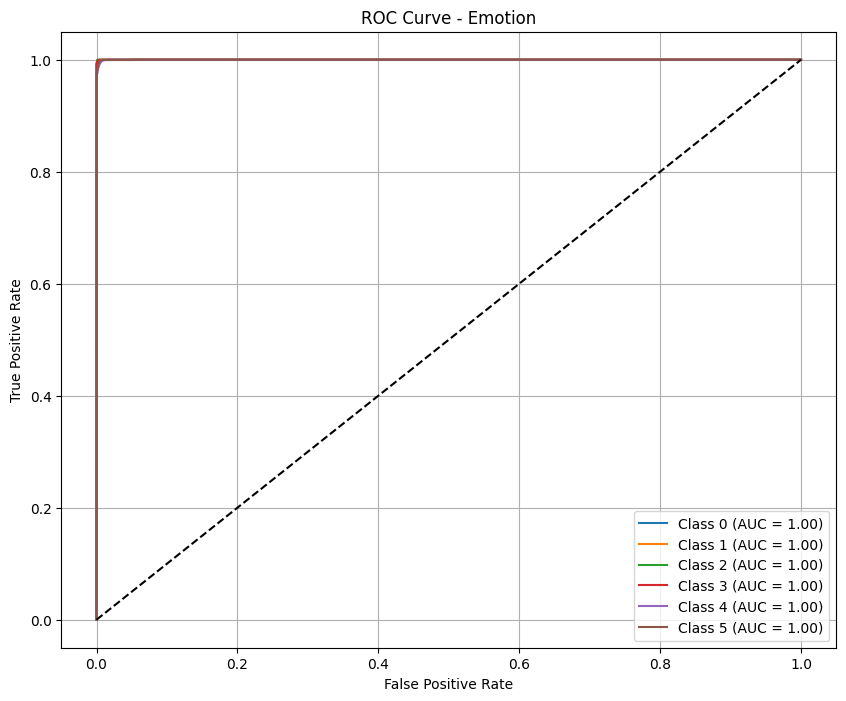

<ipython-input-110-34bc2cb72c61>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


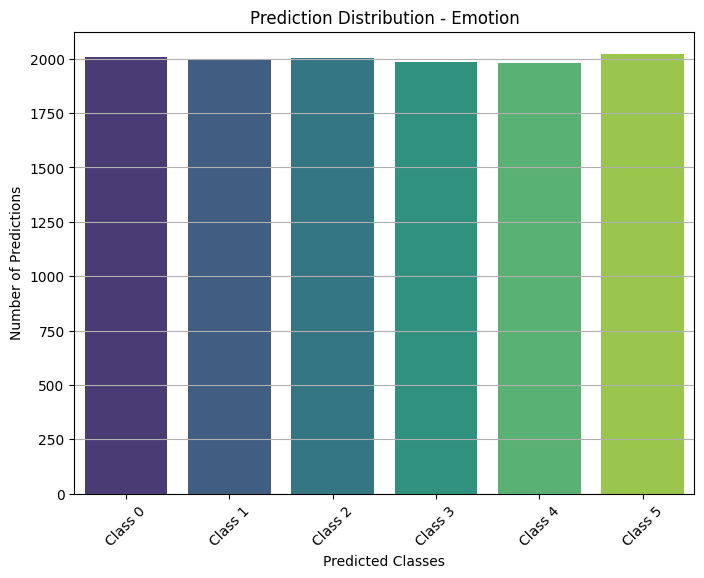

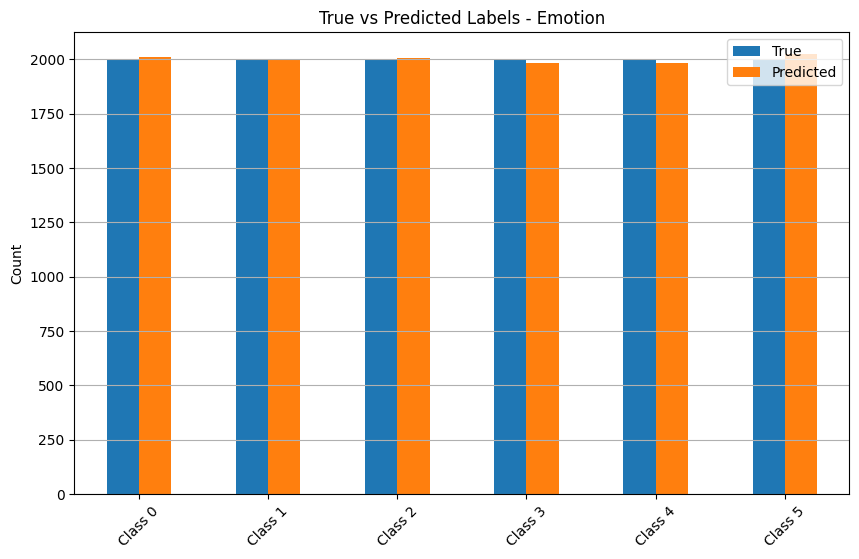

Emotion ROC-AUC: 1.0000

Violence Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       188
     Class 1       1.00      1.00      1.00      5946
     Class 2       1.00      1.00      1.00       217
     Class 3       1.00      1.00      1.00       651
     Class 4       1.00      1.00      1.00      4998

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



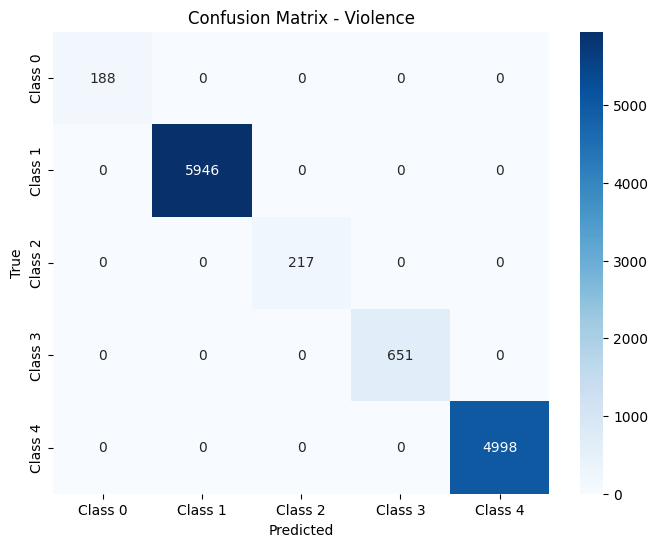

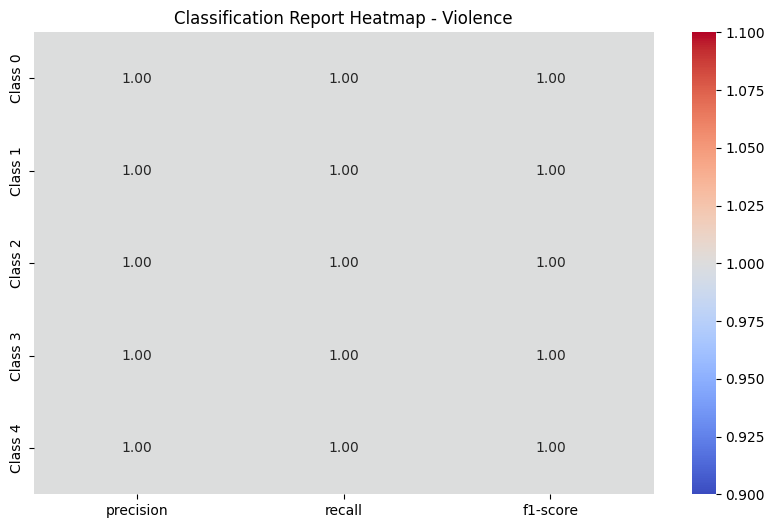

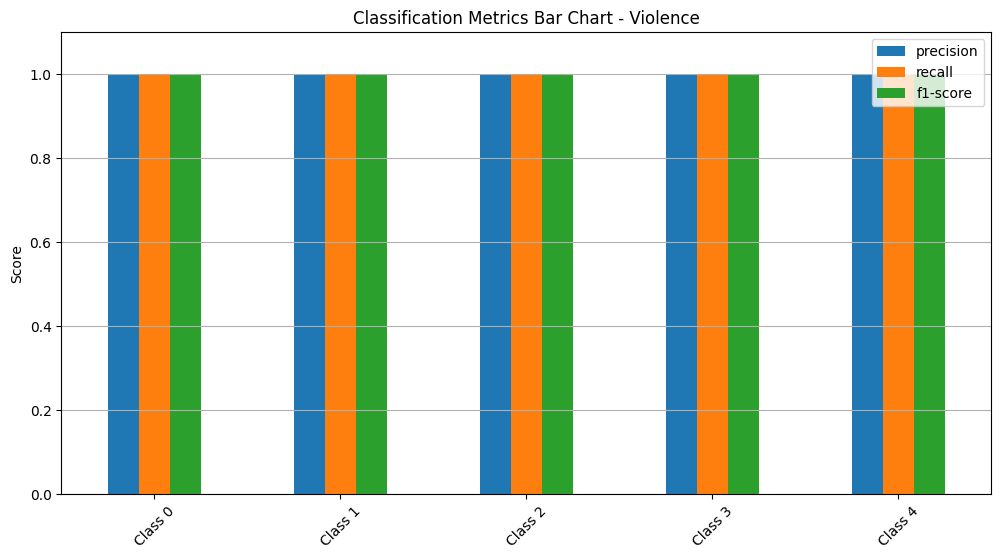

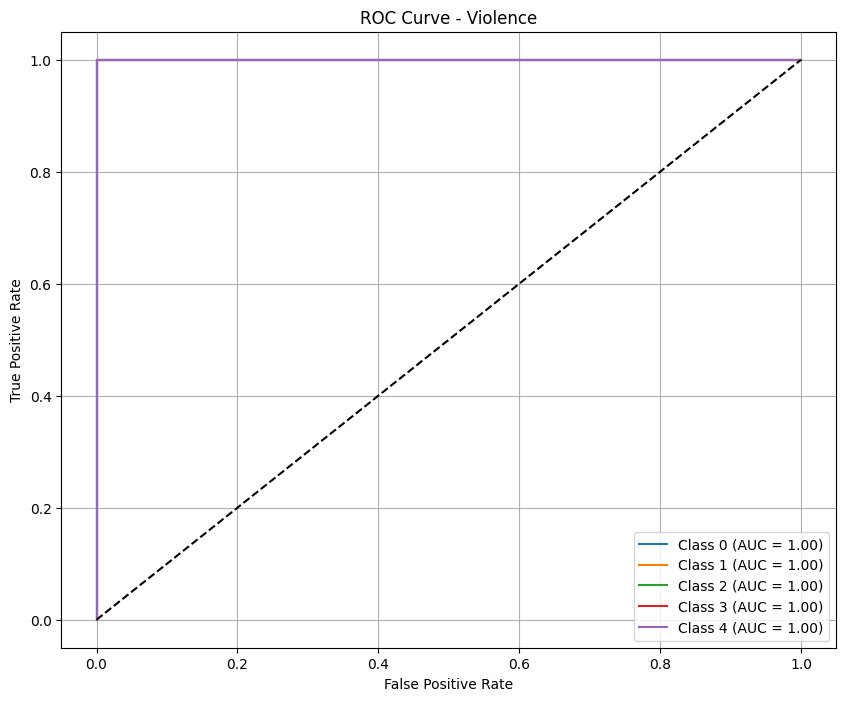

<ipython-input-110-34bc2cb72c61>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


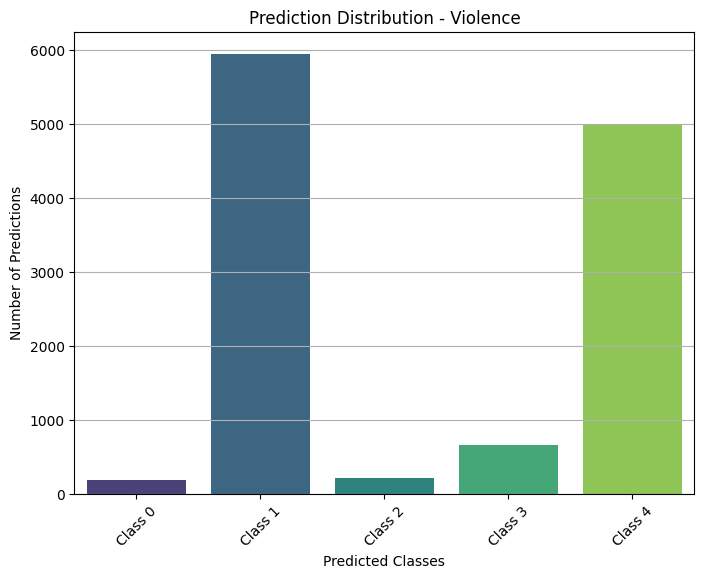

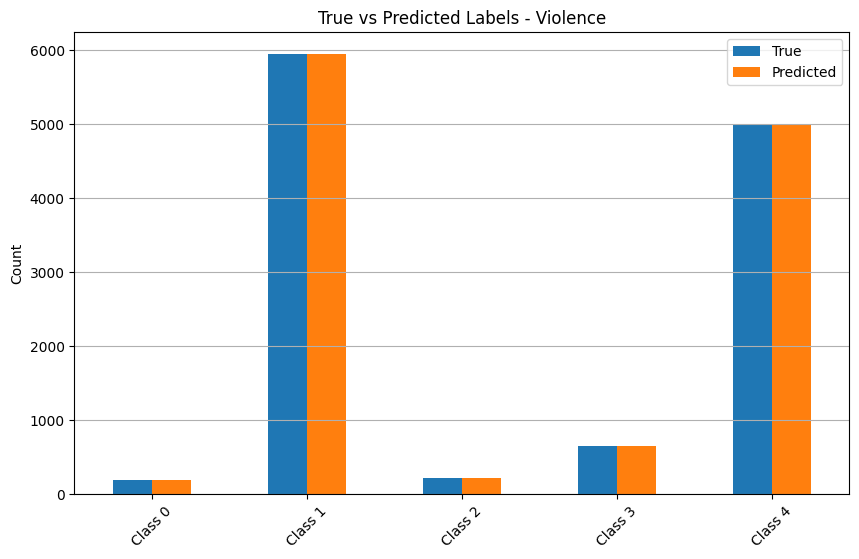

Violence ROC-AUC: 1.0000

Hate Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1430
     Class 1       1.00      1.00      1.00      6407
     Class 2       1.00      1.00      1.00      4163

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



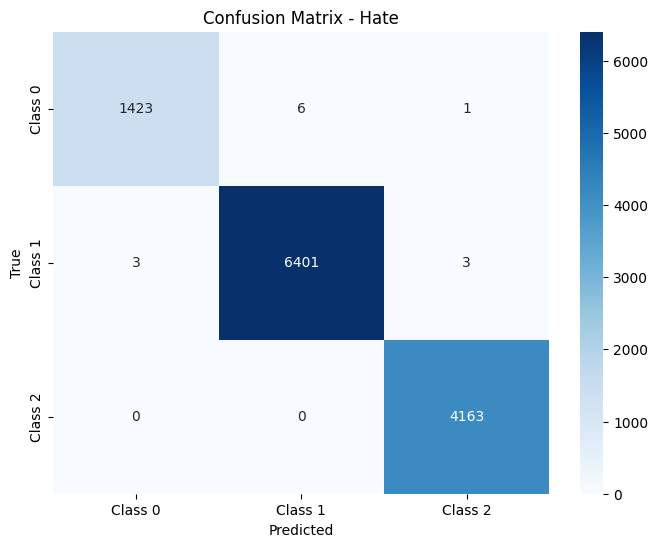

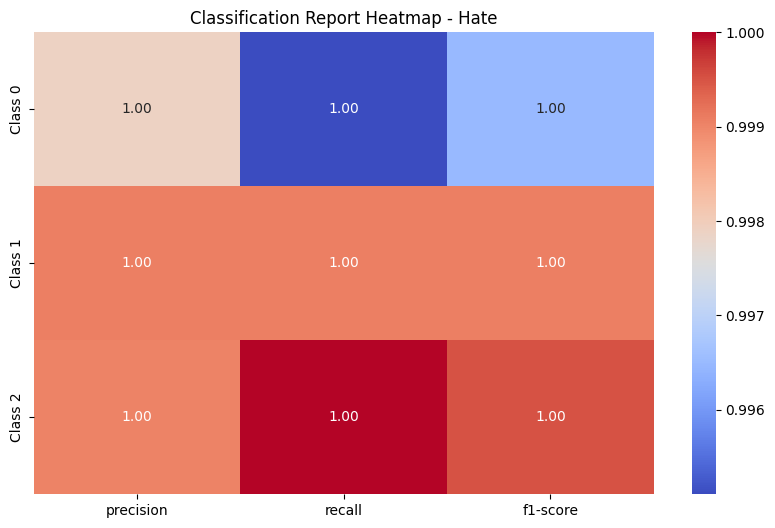

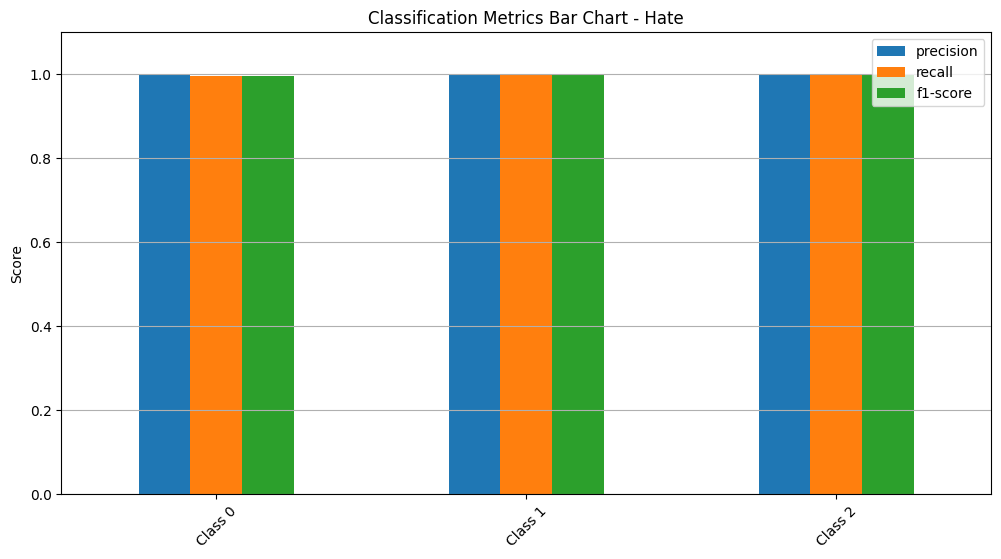

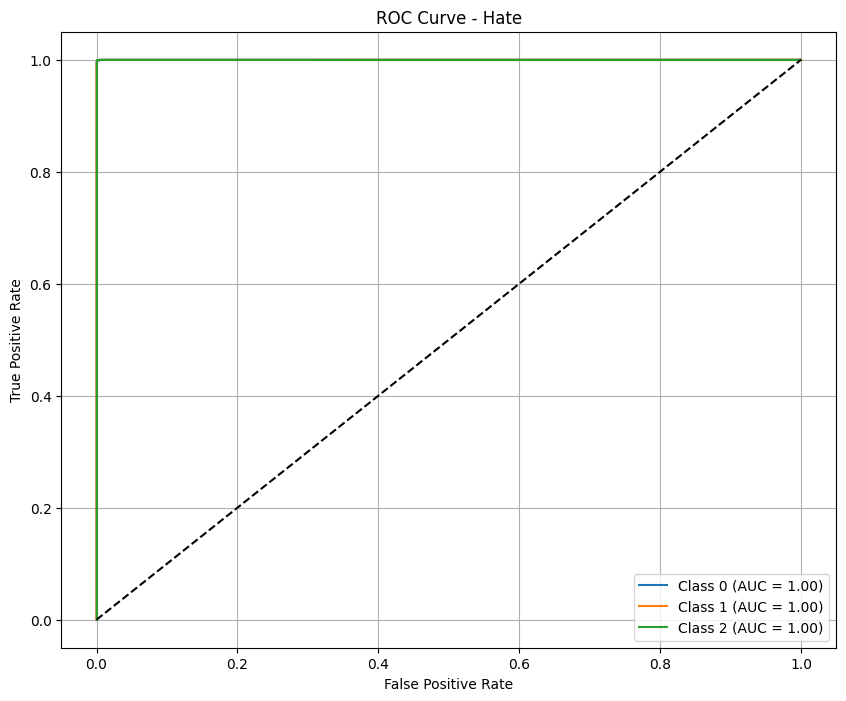

<ipython-input-110-34bc2cb72c61>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


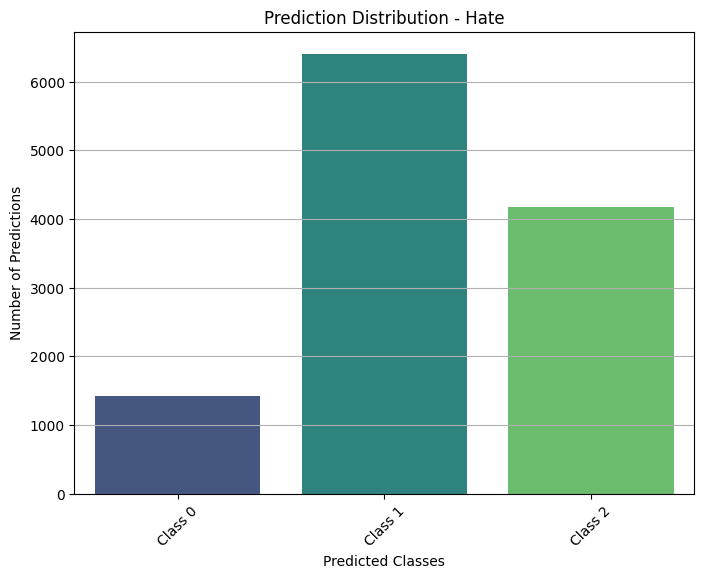

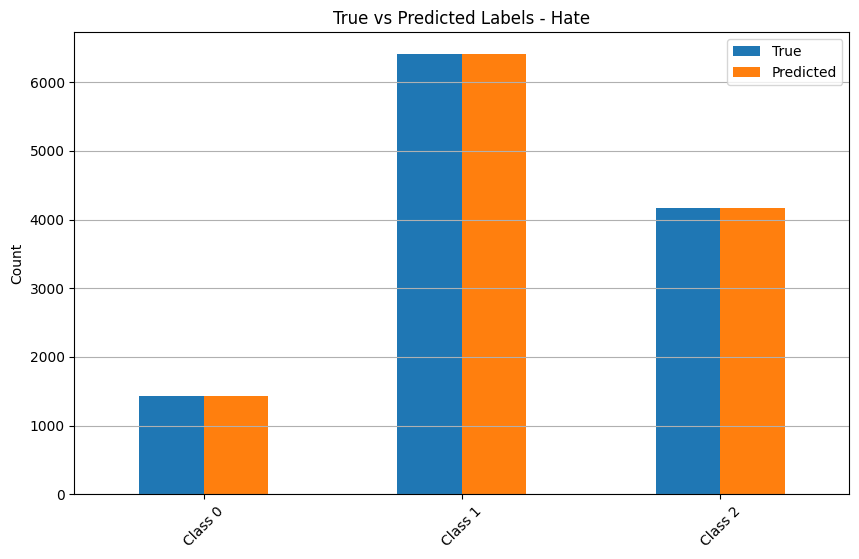

Hate ROC-AUC: 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# ---- Helper Functions ----

# Plot Confusion Matrix Heatmap
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot Classification Report Heatmap
def plot_classification_report_heatmap(y_true, y_pred, labels, title):
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.iloc[:-3, :3]  # Remove 'accuracy', 'macro avg', 'weighted avg'

    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Classification Report Heatmap - {title}')
    plt.show()

# Plot ROC Curve
def plot_roc_curve(y_true, y_probs, labels, title):
    y_true_bin = label_binarize(y_true, classes=range(len(labels)))

    plt.figure(figsize=(10, 8))
    for i in range(len(labels)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot Bar Chart for Classification Report
def plot_classification_bar(y_true, y_pred, labels, title):
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.iloc[:-3, :3]  # Remove 'accuracy', 'macro avg', 'weighted avg'

    df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
    plt.title(f'Classification Metrics Bar Chart - {title}')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

# Visualize model predictions - simple count
def plot_prediction_distribution(y_pred, labels, title):
    counts = pd.Series(y_pred).value_counts().sort_index()
    counts.index = labels

    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Prediction Distribution - {title}')
    plt.ylabel('Number of Predictions')
    plt.xlabel('Predicted Classes')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Compare True Labels vs Predicted Labels
def plot_true_vs_pred(y_true, y_pred, labels, title):
    true_counts = pd.Series(y_true).value_counts().sort_index()
    pred_counts = pd.Series(y_pred).value_counts().sort_index()

    df = pd.DataFrame({'True': true_counts, 'Predicted': pred_counts})
    df.index = labels

    df.plot(kind='bar', figsize=(10,6))
    plt.title(f'True vs Predicted Labels - {title}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# If you have probabilities (optional)
def plot_prediction_probabilities(y_probs, labels, title):
    avg_probs = np.mean(y_probs, axis=0)

    plt.figure(figsize=(10,6))
    sns.barplot(x=labels, y=avg_probs, palette='coolwarm')
    plt.title(f'Average Prediction Probabilities - {title}')
    plt.ylabel('Average Confidence')
    plt.ylim(0, 1.0)
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

# Auto-fix label names if mismatch
def fix_labels(y_true, labels_text):
    n_classes = len(np.unique(y_true))
    if len(labels_text) != n_classes:
        labels_text = [f'Class {i}' for i in range(n_classes)]
    return labels_text

# ---- Labels Texts (edit if needed) ----
emotion_labels_text = ['Happy', 'Sad', 'Angry', 'Neutral']
violence_labels_text = ['Violent', 'Non-Violent']
hate_labels_text = ['Hate Speech', 'Not Hate Speech']

# ---- Emotion ----

# Assuming y_true and y_pred are the true and predicted labels
emotion_labels_text = fix_labels(emotion_labels, emotion_labels_text)
emotion_report = classification_report(emotion_labels, emotion_pred, target_names=emotion_labels_text)
print("Emotion Classification Report:\n", emotion_report)

# Plot performance metrics
plot_confusion_matrix(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_classification_report_heatmap(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_classification_bar(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')
plot_roc_curve(emotion_labels, prediction[0], emotion_labels_text, 'Emotion')
plot_prediction_distribution(emotion_pred, emotion_labels_text, 'Emotion')
plot_true_vs_pred(emotion_labels, emotion_pred, emotion_labels_text, 'Emotion')

emotion_roc_auc = roc_auc_score(emotion_labels, prediction[0], multi_class='ovr')
print(f'Emotion ROC-AUC: {emotion_roc_auc:.4f}')

# ---- Violence ----

violence_labels_text = fix_labels(violence_labels, violence_labels_text)
violence_report = classification_report(violence_labels, violence_pred, target_names=violence_labels_text)
print("\nViolence Classification Report:\n", violence_report)

# Plot performance metrics
plot_confusion_matrix(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_classification_report_heatmap(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_classification_bar(violence_labels, violence_pred, violence_labels_text, 'Violence')
plot_roc_curve(violence_labels, prediction[1], violence_labels_text, 'Violence')
plot_prediction_distribution(violence_pred, violence_labels_text, 'Violence')
plot_true_vs_pred(violence_labels, violence_pred, violence_labels_text, 'Violence')

violence_roc_auc = roc_auc_score(violence_labels, prediction[1], multi_class='ovr')
print(f'Violence ROC-AUC: {violence_roc_auc:.4f}')

# ---- Hate ----

hate_labels_text = fix_labels(hate_labels, hate_labels_text)
hate_report = classification_report(hate_labels, hate_pred, target_names=hate_labels_text)
print("\nHate Classification Report:\n", hate_report)

# Plot performance metrics
plot_confusion_matrix(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_classification_report_heatmap(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_classification_bar(hate_labels, hate_pred, hate_labels_text, 'Hate')
plot_roc_curve(hate_labels, prediction[2], hate_labels_text, 'Hate')
plot_prediction_distribution(hate_pred, hate_labels_text, 'Hate')
plot_true_vs_pred(hate_labels, hate_pred, hate_labels_text, 'Hate')

hate_roc_auc = roc_auc_score(hate_labels, prediction[2], multi_class='ovr')
print(f'Hate ROC-AUC: {hate_roc_auc:.4f}')
